# **Project Name**    - Flipkart Customer Satisfaction Analysis Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

In the highly competitive e-commerce space, delivering excellent customer service is crucial for sustaining growth, fostering customer loyalty, and maintaining a competitive edge. Flipkart, being one of the largest e-commerce platforms in India, prioritizes customer satisfaction as a core business strategy. This project aims to analyze customer interactions, feedback, and satisfaction scores across multiple support channels at Flipkart. By identifying key drivers of customer satisfaction, evaluating service agent performance, and detecting patterns of dissatisfaction, the project aims to provide actionable insights that can improve overall service quality, enhance customer retention, and increase brand loyalty.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive e-commerce landscape, delivering excellent customer support is vital for retaining customers and building brand loyalty. Flipkart, handling large volumes of customer interactions across phone, email, and chat, faces challenges in ensuring consistent satisfaction levels. Varying resolution times, service agent performance, and channel effectiveness impact overall customer experience.

This project aims to:
* **Identify key drivers of customer satisfaction** by analyzing CSAT scores, issue types, and support channels.
* **Evaluate service agent performance** based on resolution efficiency and satisfaction outcomes.
* **Recommend strategies** to improve service quality, reduce resolution times, and enhance customer retention.

The insights will help Flipkart optimize its support operations and boost customer satisfaction.

#### **Define Your Business Objective?**

1. **Identify Key Drivers of Customer Satisfaction:**

Analyze customer interactions and satisfaction scores (CSAT) to determine the factors influencing customer satisfaction, such as resolution time, support channel effectiveness, and service agent performance.

2. **Evaluate Service Agent Performance:**

Assess the efficiency and effectiveness of service agents by analyzing their resolution times and CSAT scores to identify top performers and areas needing improvement.

3. **Analyze Support Channel Effectiveness:**

Compare satisfaction levels across different support channels (phone, email, chat) to identify which channels deliver the best customer experience and which need optimization.

4. **Optimize Resolution Times:**

Examine the relationship between resolution time and satisfaction levels to recommend strategies for faster and more efficient issue resolution.

5. **Enhance Customer Retention and Loyalty:**

Use insights from the analysis to recommend actionable strategies that improve service quality, increase CSAT scores, and boost customer loyalty and retention.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [90]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [91]:
# Load Dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
path = '/content/drive/MyDrive/Flipkart_EDA_Project/Customer_support_data.csv'  # File path for the 'titles' df

# Load the df using the load_csv function
df = load_csv(file_path=path)  # Load customer support df

# Display all columns
pd.set_option('display.max_columns', None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [92]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [93]:
# Dataset Rows & Columns count
print("Number of Rows =", df.shape[0])
print("Number of Columns =", df.shape[1])

Number of Rows = 85907
Number of Columns = 20


### Dataset Information

In [94]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [95]:
# Dataset Duplicate Value Count
print('Number of Duplicates in Dataset = ', df.duplicated().sum())

Number of Duplicates in Dataset =  0


#### Missing Values/Null Values

In [96]:
# Missing Values/Null Values Count
print('Number of Missing/Null Values in Dataset =', df.isnull().sum().sum())

Number of Missing/Null Values in Dataset = 435995


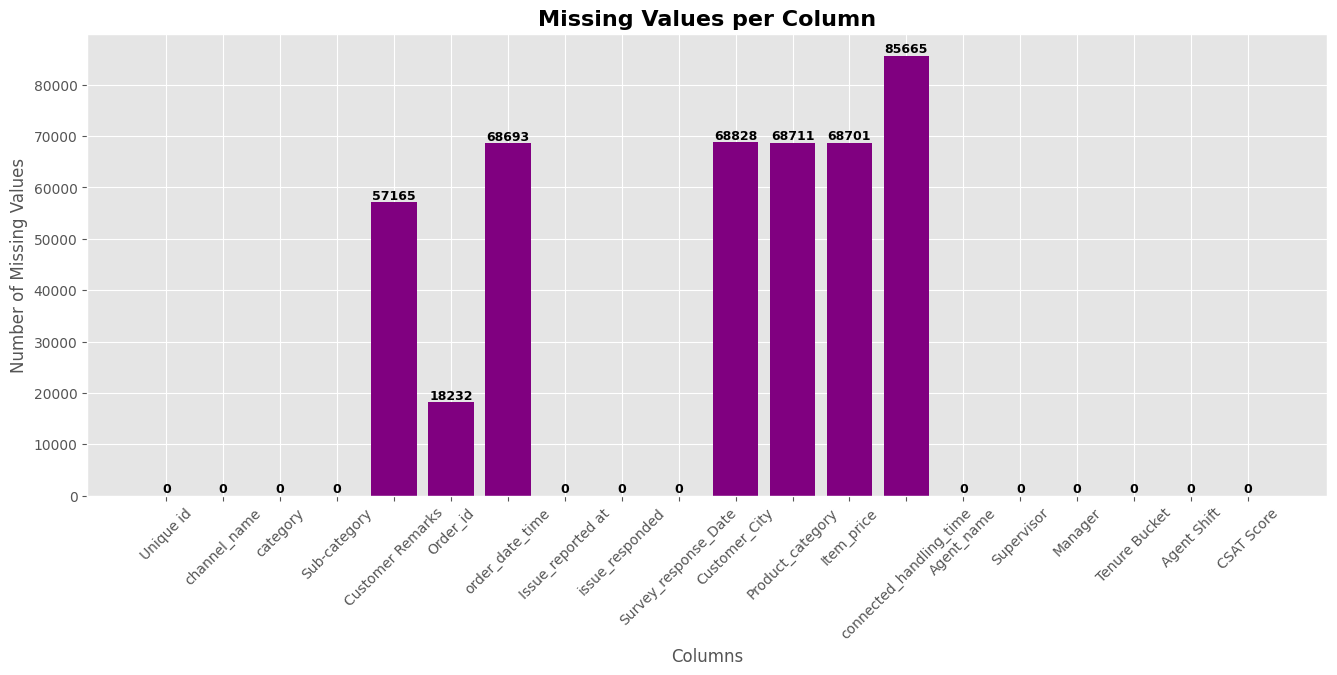

In [97]:
# Visualizing the missing values
# Calculating the number of missing values per column
missing_values = df.isnull().sum()

# Filtering only columns with missing values
#missing_values = missing_values[missing_values > 0]

# Plotting the missing values
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='purple')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Adding labels and title
plt.title('Missing Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### What did you know about your dataset?

The dataset contains 85,907 rows and 20 columns, capturing detailed customer support interactions at Flipkart. There are no duplicate values, ensuring data integrity.

A total of 43,995 missing/null values are present across 7 columns, namely:

* Subcategory

* Customer Remarks

* Order ID

* Survey Response Date

* Customer City

* Product Category

* Item Price

The dataset offers insights into customer satisfaction levels, support channel performance, service agent efficiency, and issue resolution times, making it ideal for analyzing factors that influence customer experience and identifying areas for service improvement.

## ***2. Understanding Your Variables***

In [98]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [99]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

* **Unique id:** Unique identifier for each customer support interaction.
* **channel_name:** The support channel used (inbound, outbound, email).
* **category:** The main category of the issue reported.
* **Sub-category:** The subcategory providing more specific issue details.
* **Customer Remarks:** Textual feedback or comments from the customer.
* **Order_id:** Unique identifier for the order related to the issue.
* **order_date_time:** The date and time when the order was placed.
* **Issue_reported at:** The timestamp when the issue was reported.
* **issue_responded:** The timestamp when the support team responded.
* **Survey_response_Date:** The date when the customer provided feedback.
* **Customer_City:** The city where the customer is located.
* **Product_category:** The category of the product related to the issue.
* **Item_price:** The price of the product involved in the issue.
* **connected_handling_time:** The duration of the support interaction.
* **Agent_name:** The name of the support agent handling the issue.
* **Supervisor:** The supervisor overseeing the support agent.
* **Manager:** The manager responsible for the support operations.
* **Tenure Bucket:** The experience range of the support agent (e.g., 0-1 year).
* **Agent Shift:** The working shift of the support agent (e.g., morning, evening).
* **CSAT Score:** Customer Satisfaction Score (1-5) given after the interaction.

### Check Unique Values for each variable.

In [100]:
# Check Unique Values for each variable.
print('\n Number of Unique Values in each column :\n')
print(df.nunique())


 Number of Unique Values in each column :

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [101]:
# Write your code to make your dataset analysis ready.
# Create copy of dataset
df1 = df.copy()

In [102]:
# Handle Missing Values
# 1. Categorical/Text Columns
df1['Customer Remarks'] = df1['Customer Remarks'].fillna('No remarks')  # Fill with 'No remarks'
df1['Customer_City'] = df1['Customer_City'].fillna('Unknown City')      # Fill with 'Unknown City'
df1['Product_category'] = df1['Product_category'].fillna('Unknown Category')  # Fill with 'Unknown Category'

# 2. Numerical Columns
# Fill missing values with median
df1['Item_price'] = df1['Item_price'].fillna(df1['Item_price'].median())
df1['connected_handling_time'] = df1['connected_handling_time'].fillna(df1['connected_handling_time'].median())

In [103]:
# Order ID Column (drop missing rows as it is an identifier)
df1 = df1.dropna(subset=['Order_id'])

In [104]:
# Converting Datatypes for DateTime Columns
date_cols =['order_date_time','Issue_reported at','issue_responded']
# Using for loop to convert each date column to datetime format
for col in date_cols:
    df1[col] = pd.to_datetime(df1[col],errors='coerce')

In [105]:
# Converted into DateTime datatype
df1['Survey_response_Date'] = pd.to_datetime(df1['Survey_response_Date'], format='%d-%b-%y', errors='coerce')

In [106]:
# Filling Missing Dates
# Fill missing dates with min or max date
min_date = df1[date_cols].min().min()
max_date = df1[date_cols].max().max()

# Fill missing datetime values with min date
for col in date_cols:
    df1[col] = df1[col].fillna(min_date)

In [107]:
# Identifying Numerical, Categorical & DateTime Variables
# Initialize empty lists to store variable types
numerical_cols = []
categorical_cols = []
datetime_cols = []

# Loop through each column to identify the data type
for col in df1.columns:

    # First, check if the column is already in datetime format
    if pd.api.types.is_datetime64_any_dtype(df1[col]):
        datetime_cols.append(col)

    # Second, check for numerical columns
    elif df1[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)

    # Third, attempt datetime conversion only on object or category columns
    elif df1[col].dtype in ['object', 'category']:
        try:
            # Try converting the column to datetime
            df1[col] = pd.to_datetime(df1[col], errors='raise')
            datetime_cols.append(col)
        except (ValueError, TypeError):
            categorical_cols.append(col)

    # For all remaining columns, classify as categorical
    else:
        categorical_cols.append(col)

# Display the results
print("Numerical Variables:")
print(numerical_cols)

print("Categorical Variables:")
print(categorical_cols)

print("Datetime Variables:")
print(datetime_cols)

Numerical Variables:
['Item_price', 'connected_handling_time', 'CSAT Score']
Categorical Variables:
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']
Datetime Variables:
['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']


In [108]:
# Calculating interaction duration (No of days taken from issue reported to issue resolved)
df1['interaction_duration_days'] = (df1['issue_responded'] - df1['Issue_reported at']).dt.days

In [109]:
# Identify and display rows with negative interaction duration
negative_rows = df1[df1['interaction_duration_days'] < 0]
print("Rows with Negative Interaction Duration:", len(negative_rows))

Rows with Negative Interaction Duration: 176


In [110]:
# Correcting Negative Durations
# Swap dates for negative durations
mask = df1['Issue_reported at'] > df1['issue_responded']
df1.loc[mask, ['Issue_reported at', 'issue_responded']] = df1.loc[mask, ['issue_responded', 'Issue_reported at']].values

# Recalculate the interaction duration in days
df1['interaction_duration_days'] = (df1['issue_responded'] - df1['Issue_reported at']).dt.days

In [111]:
# Verify no more negative durations
negative_rows_after = df1[df1['interaction_duration_days'] < 0]
print("Remaining Negative Durations (Should be 0):", len(negative_rows_after))

Remaining Negative Durations (Should be 0): 0


In [112]:
# Categorizing CSAT Score
df1['CSAT_Category'] = pd.cut(df1['CSAT Score'],
                             bins=[0, 2, 4, 5],
                             labels=['Low', 'Medium', 'High'])

In [113]:
# Calculated Sentiment Score from Customer Remarks
from textblob import TextBlob

def get_sentiment(text):
    if pd.isnull(text):
        return None
    return TextBlob(text).sentiment.polarity

df1["sentiment_score"] = df1["Customer Remarks"].apply(get_sentiment)

In [114]:
# Checking missing/null values after cleaning dataset
print("Missing Values After Handling:\n")
print(df1.isnull().sum())

Missing Values After Handling:

Unique id                    0
channel_name                 0
category                     0
Sub-category                 0
Customer Remarks             0
Order_id                     0
order_date_time              0
Issue_reported at            0
issue_responded              0
Survey_response_Date         0
Customer_City                0
Product_category             0
Item_price                   0
connected_handling_time      0
Agent_name                   0
Supervisor                   0
Manager                      0
Tenure Bucket                0
Agent Shift                  0
CSAT Score                   0
interaction_duration_days    0
CSAT_Category                0
sentiment_score              0
dtype: int64


In [115]:
# View Cleaned Dataset
df1.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,interaction_duration_days,CSAT_Category,sentiment_score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2022-01-16 13:15:00,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,Unknown City,Unknown Category,979.0,427.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,High,0.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,2022-01-16 13:15:00,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,Unknown City,Unknown Category,979.0,427.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,High,0.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,2022-01-16 13:15:00,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,Unknown City,Unknown Category,979.0,427.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,High,0.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No remarks,5aed0059-55a4-4ec6-bb54-97942092020a,2022-01-16 13:15:00,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,Unknown City,Unknown Category,979.0,427.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,High,0.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2022-01-16 13:15:00,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,Unknown City,Unknown Category,979.0,427.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,High,0.0


### What all manipulations have you done and insights you found?

1. **Handle Missing Values-**

  **Manipulations:**
* For categorical/text columns (Customer Remarks, Customer City, Product Category), missing values were filled with "No Remarks", "Unknown City" and "Unknown Category".
* For numerical columns (Item Price and Connected Handling Time), missing values were filled with the median value.
* Dropped missing rows in Order ID since it is an identifier, and missing values indicate incomplete or invalid records.

  **Insights:**
* Filling missing values with appropriate placeholders ensures data consistency and prevents issues during analysis.
* Using the median for numerical columns prevents the influence of outliers, ensuring more accurate central tendency representation.
* Dropping rows with missing Order ID ensures data integrity by removing incomplete records.


2. **Data Type Correction-**

  **Manipulations:**
* Converted date-related columns (survey_response_date, order_date_time, issue_reported_at, and issue_responded) from object to datetime format.
* Missing date values were filled with the minimum date in the dataset to ensure consistency.

  **Insights:**
* Converting date columns into datetime format allows for time-based operations (e.g., calculating duration, filtering by date range).
* Filling missing dates with the minimum date ensures there are no gaps in time-based analysis.


3. **Interaction Duration Calculation-**

  **Manipulations:**
* Created a new column, interaction duration, which calculates the number of days between issue_reported and issue_responded.
* Fixed negative duration values (possibly caused by incorrect date entries or processing errors).

  **Insights:**
* The interaction duration column provides valuable insights into support efficiency by tracking how long it takes to resolve issues.
* Negative durations were corrected, ensuring data consistency.
* This column will be useful for identifying outliers and analyzing the impact of resolution time on customer satisfaction.


4. **CSAT Categorization-**

  **Manipulations:**
* Created a new column CSAT Category by grouping the CSAT Score into three categories:
  * Low: CSAT score of 0-2 (dissatisfied customers).
  * Medium: CSAT score of 2-4 (neutral customers).
  * High: CSAT score of 4-5 (satisfied customers).

  **Insights:**
* Categorizing the CSAT scores allows for easy segmentation of satisfaction levels, making it easier to visualize and interpret customer sentiment.
* This helps identify areas of improvement by analyzing the proportion of low, medium, and high satisfaction groups.



5. **Sentiment Analysis-**

  **Manipulations:**
* Created a new column sentiment score, which calculates the sentiment polarity of Customer Remarks.
* Sentiment scores are categorized as:
  * Positive (score > 0)
  * Neutral (score = 0)
  * Negative (score < 0)

  **Insights:**
* Sentiment analysis helps interpret customer feedback qualitatively, identifying common complaints or praises.
* It enables the business to pinpoint recurring issues or areas of satisfaction, offering valuable insights for service improvement.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [116]:
# Setting visualization style
plt.style.use('ggplot')

### **Univariate Analysis**

#### Chart - 1 - CSAT Score Distribution

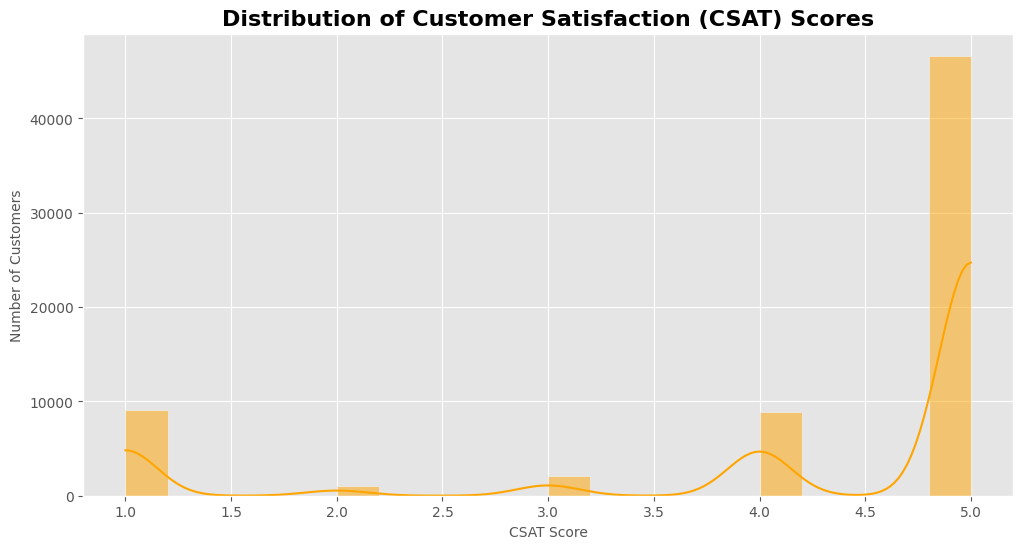

In [117]:
# Chart - 1 visualization code
# Set plot size
plt.figure(figsize=(12, 6))

# Plot CSAT distribution
sns.histplot(df1['CSAT Score'], bins=20, kde=True, color='orange')

# Add title and labels
plt.title('Distribution of Customer Satisfaction (CSAT) Scores', fontsize=16, fontweight = 'bold')
plt.xlabel('CSAT Score', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is the best choice for-
* Visualizing the distribution of CSAT scores, showing how frequently each score appears.
* Identifying trends in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

* The majority of customers rated satisfaction as 5, indicating strong positive feedback.
* Some customers gave low ratings (1 and 4), but ratings 2 and 3 are minimal, suggesting customers are either highly satisfied or highly dissatisfied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:** High CSAT scores (especially 5) indicate a strong customer experience.

* **Negative Insight:** The presence of low ratings (1 and 4) suggests gaps in service that need improvement. Identifying and addressing the reasons for dissatisfaction can enhance customer retention.

#### Chart - 2 Distribution of Support Channels

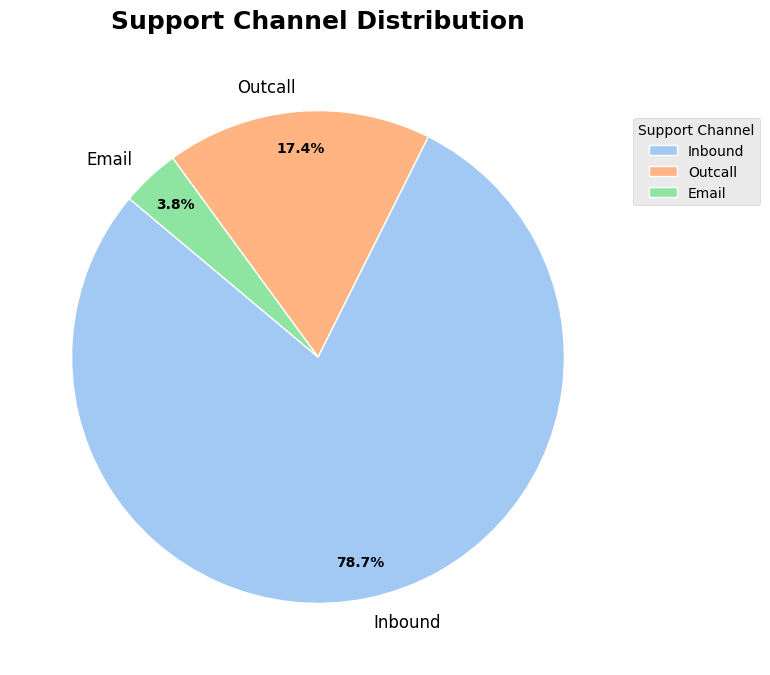

In [118]:
# Chart - 2 visualization code
# Group by CSAT Category and count occurrences
channel_distribution = df1['channel_name'].value_counts()

# Set plot size and style
fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette('pastel')

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    channel_distribution,
    labels=channel_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=0.85
)

# Add title (aligned center)
plt.title('Support Channel Distribution', fontsize=18, pad=15, fontweight = 'bold')

# Improve pie chart aesthetics
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, fontsize=12)

# Align legend properly to avoid overlap
plt.legend(channel_distribution.index, title='Support Channel', loc='upper left', bbox_to_anchor=(1, 0.9))

# Display the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart effectively shows the proportional distribution of support channels, making it easy to compare the usage share of each channel.

##### 2. What is/are the insight(s) found from the chart?

* Inbound channel dominates with 78.7%, indicating it handles the majority of customer interactions.
* Outcall accounts for 17.4%, while Email is the least used at 3.8%, suggesting it is a minor channel for support.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:** The dominance of Inbound support highlights its efficiency and popularity, allowing businesses to allocate more resources here.
* **Negative Insight:**
* The low usage of Email suggests it may be an underutilized channel or customers prefer quicker support options.
* Neglecting email support could lead to customer dissatisfaction for those who prefer written communication, impacting customer experience.

#### Chart - 3 - Distribution of Interaction Duration (Histogram)

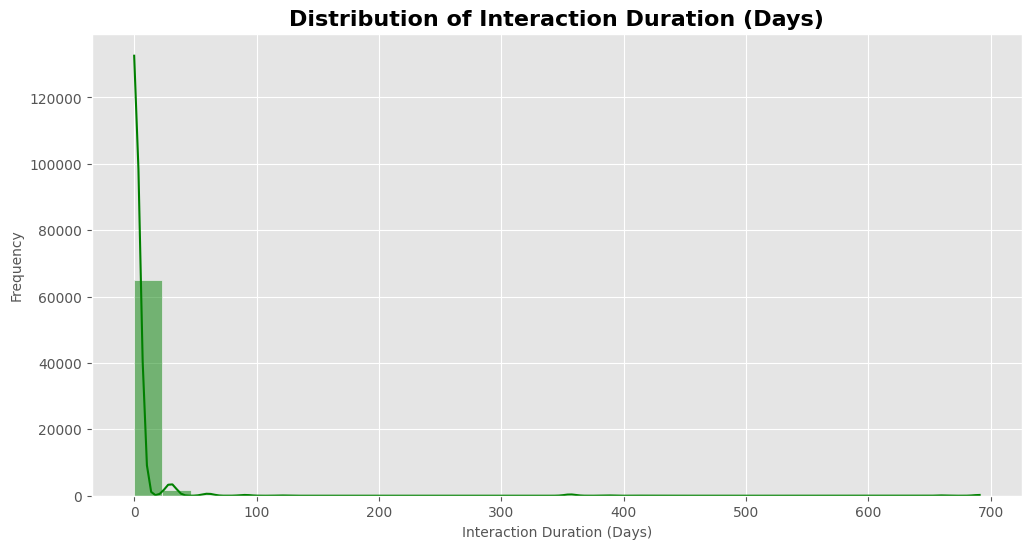

In [119]:
# Chart - 3 visualization code
# Set plot size
plt.figure(figsize=(12, 6))

# Plot interaction duration
ax = sns.histplot(df1['interaction_duration_days'], bins=30, kde=True, color='green')

# Add title and labels
plt.title('Distribution of Interaction Duration (Days)', fontsize=16, fontweight = 'bold')
plt.xlabel('Interaction Duration (Days)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Distribution of Interaction Duration (Box Plot)

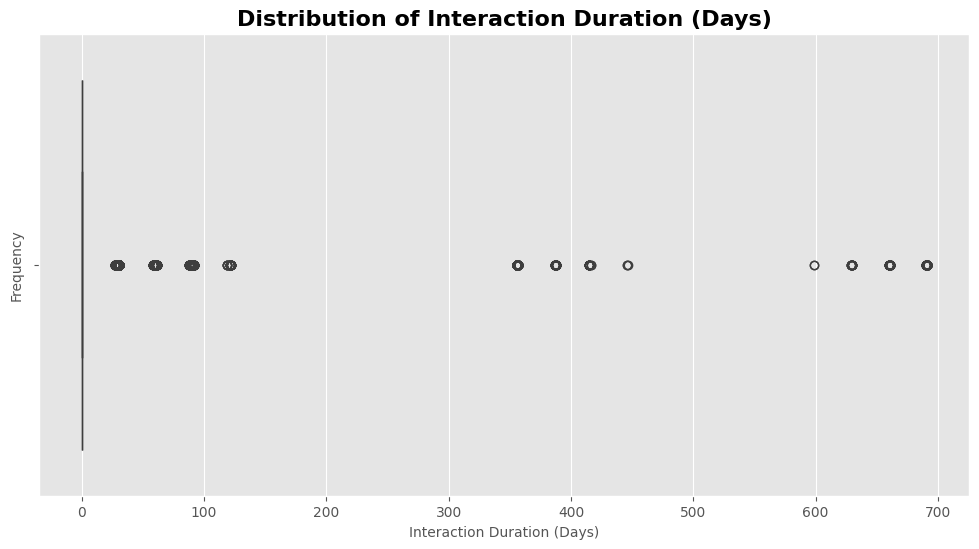

In [120]:
# Chart - 4 visualization code
# Set Plot size
plt.figure(figsize=(12, 6))

# Plot interaction duration
sns.boxplot(data = df1, x = 'interaction_duration_days', color = 'brown')

# Add title and labels
plt.title('Distribution of Interaction Duration (Days)', fontsize=16, fontweight = 'bold')
plt.xlabel('Interaction Duration (Days)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for-
* Detecting outliers and visualizing the spread and distribution of interaction durations.
* It highlights the range, median, and extreme values.

##### 2. What is/are the insight(s) found from the chart?

* The majority of interaction durations are clustered near 0, indicating most cases are resolved quickly.
* There are numerous outliers with extremely high interaction durations (100+ days), showing unusually long unresolved cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:** Identifying outliers enables the business to flag and investigate delayed cases, improving efficiency.
* **Negative Insight:**
* The significant presence of outliers indicates prolonged resolution times, which can negatively impact customer satisfaction.
* Delayed interactions suggest inefficiencies in customer service processes, leading to frustration and churn.


#### Chart - 5 - Distribution of Handling Time

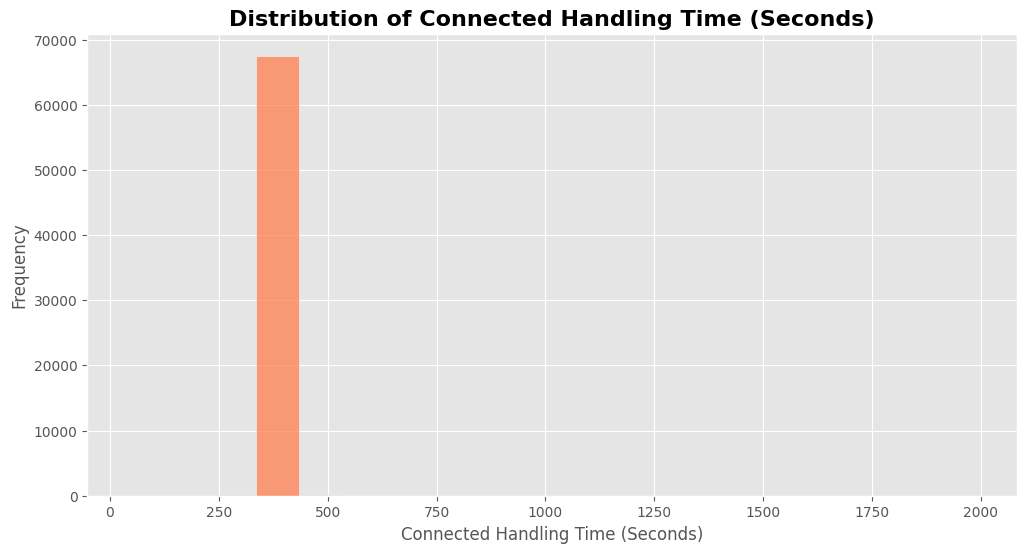

In [121]:
# Chart - 5 visualization code
# Set plot size
plt.figure(figsize=(12, 6))


# Plot handling time
ax = sns.histplot(df1['connected_handling_time'], bins=20, color='coral')

# Add title and labels
plt.title('Distribution of Connected Handling Time (Seconds)', fontsize=16, fontweight = 'bold')
plt.xlabel('Connected Handling Time (Seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is suitable for-
* Visualizing the distribution of connected handling time in seconds.
* It helps identify whether handling times are uniformly distributed or concentrated within a specific range.

##### 2. What is/are the insight(s) found from the chart?

* The majority of handling times are heavily concentrated around a single value (400-500 seconds).
* There is little variation, which may indicate a standardized handling time process or data issues (e.g., incorrect logging).
* No significant long-tail distribution, meaning few cases exceed the average handling time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Consistent handling times indicate standardization and efficiency in customer interactions.
* This allows businesses to predict workload and resource allocation more effectively.

**Negative Impact:**
* If the handling time is artificially constrained, it might suppress quality service by rushing interactions instead of fully resolving issues.
* The lack of variation raises concerns about whether all cases receive proper attention.


#### Chart - 6 - Distribution of Product Categories

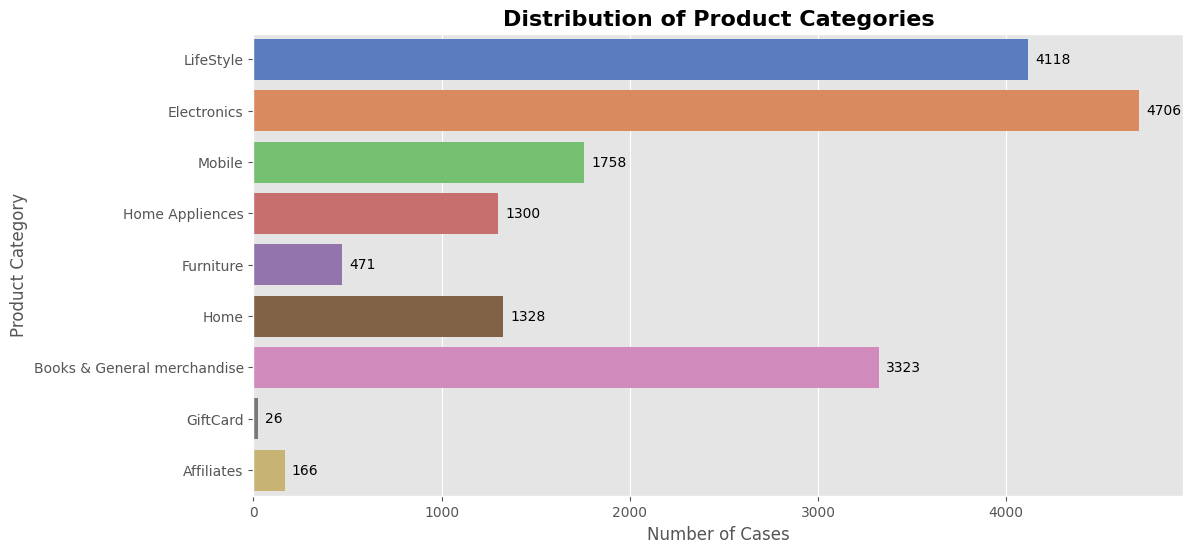

In [122]:
# Chart - 6 visualization code
# Set plot size and style
plt.figure(figsize=(12, 6))

# Filter out "Unknown" categories
valid_categories = df1[df1['Product_category'] != 'Unknown Category']

# Plot product category distribution
ax = sns.countplot(y='Product_category', data=valid_categories, palette='muted')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Add title and labels
plt.title('Distribution of Product Categories', fontsize=16, fontweight = 'bold')
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is used-
* To compare the frequency of cases across multiple product categories.
* This chart effectively displays relative differences in case volume and makes it easy to read category labels.

##### 2. What is/are the insight(s) found from the chart?

* Electronics has the highest number of cases (4,706), followed by Lifestyle (4,118) and Books & General Merchandise (3,323).
* GiftCard and Affiliates categories have the fewest cases, indicating less customer interaction with these products.
* Categories with high case volume may experience more customer issues or higher sales activity.
* Furniture and Home Appliances have relatively fewer cases, suggesting less frequent customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* The concentration of cases in popular categories like Electronics and Lifestyle provides an opportunity to improve support processes for these high-volume segments.
* Identifying low-case categories (e.g., GiftCard) allows the business to allocate fewer resources, optimizing operational efficiency.

**Negative Impact:**
* Frequent issues in Electronics could indicate product or service quality problems, potentially leading to customer dissatisfaction.
* If the high case volume is due to frequent complaints, it may damage the brand reputation.

#### Chart - 7 - Distribution of Cities

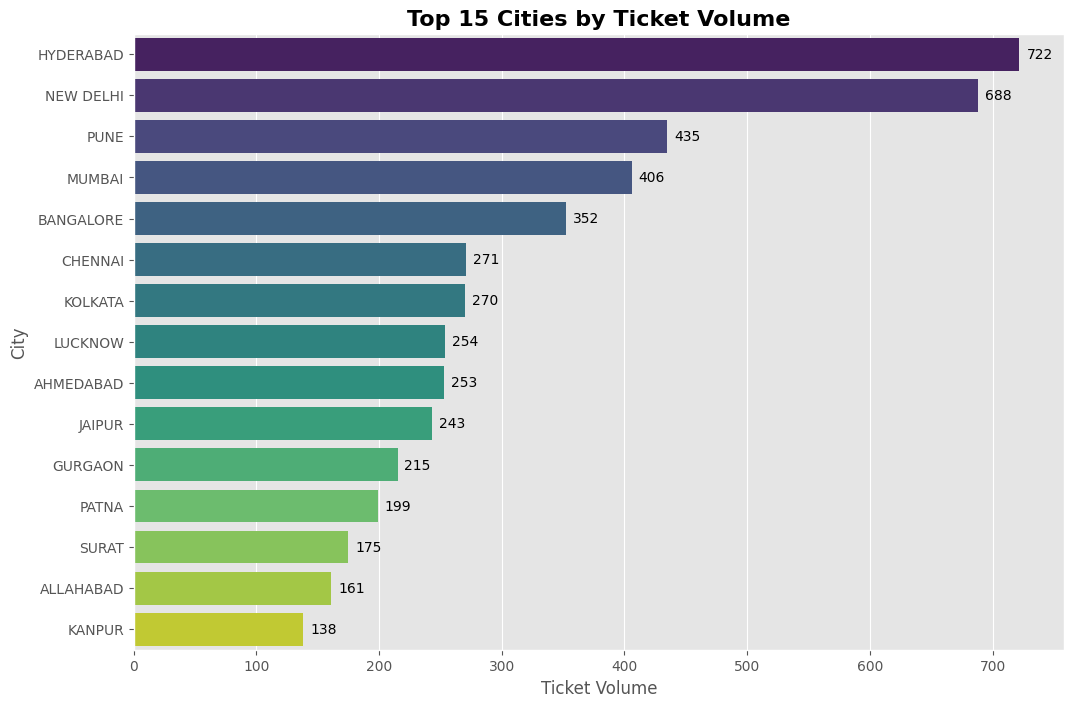

In [123]:
# Chart - 7 visualization code
# Set plot size
plt.figure(figsize=(12, 8))

# Filter out "Unknown" cities
valid_cities = df1[df1['Customer_City'] != 'Unknown City']

# Plot city distribution
top_cities = valid_cities['Customer_City'].value_counts().head(15)  # Top 15 cities
ax = sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Add title and labels
plt.title('Top 15 Cities by Ticket Volume', fontsize=16, fontweight = 'bold')
plt.xlabel('Ticket Volume', fontsize=12)
plt.ylabel('City', fontsize=12)
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is used-
* To clearly visualize the ticket volume by city.
* This chart type effectively highlights the cities with the highest and lowest volumes in a structured manner, making it easy to compare across multiple locations.

##### 2. What is/are the insight(s) found from the chart?

* Hyderabad has the highest ticket volume (722), followed by New Delhi (688) and Pune (435).
* Kanpur (138) and Allahabad (161) have the lowest ticket volumes among the top 15 cities.
* Metropolitan cities such as Hyderabad, New Delhi, and Mumbai see significantly higher customer interactions, indicating higher sales activity or more customer issues.
* The regional distribution shows that larger cities contribute to a greater ticket volume, likely due to higher population density and customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* High ticket volume in major cities indicates strong customer engagement, which could translate to higher revenue potential.
* Identifying cities with lower ticket volumes (e.g., Kanpur) allows the business to reallocate support resources efficiently.

**Negative Impact:**
* If the high ticket volume in large cities reflects frequent customer issues, it could indicate service quality problems.
* Resource strain in high-ticket cities may result in longer response times and lower customer satisfaction.


#### Chart - 8 - Distribution of Product Item Prices

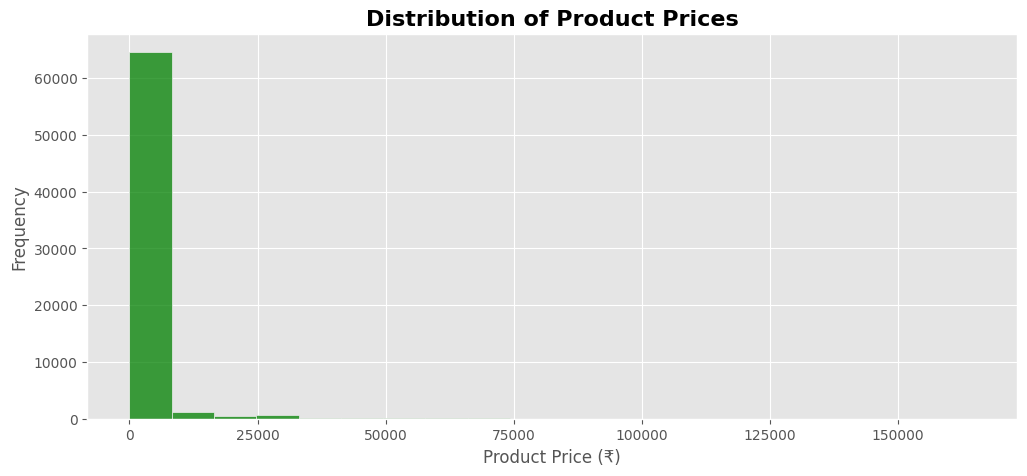

In [124]:
# Chart - 8 visualization code
# Set plot size
plt.figure(figsize=(12, 5))


# Plot product price distribution
ax = sns.histplot(df1['Item_price'], bins=20, color='green')

# Add title and labels
plt.title('Distribution of Product Prices', fontsize=16, fontweight = 'bold')
plt.xlabel('Product Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used-
* To display the distribution of product prices.
* This chart type effectively shows the frequency of products within different price ranges, highlighting pricing patterns and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

* The majority of products are priced at the lower end (close to ₹0 - ₹5000), with a steep decline in frequency as the price increases.
* Very few products have extremely high prices, which may represent premium or luxury items.
* The long tail of the distribution suggests outliers with exceptionally high prices (₹50,000 - ₹150,000).
* Price concentration is evident in the lower range, indicating that the business likely deals with affordable or mid-range products.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* The price concentration at lower ranges indicates that the company caters to a cost-sensitive customer base, which could lead to higher sales volume.
* Clear outliers can be flagged for special marketing or promotional offers, driving visibility for premium products.

**Negative Impact:**
* High-price outliers may skew average price metrics, leading to misleading financial interpretations.
* The lack of mid-range pricing might indicate a gap in product diversity, potentially limiting customer choices.

#### Chart - 9 - Sub-Category Distribution

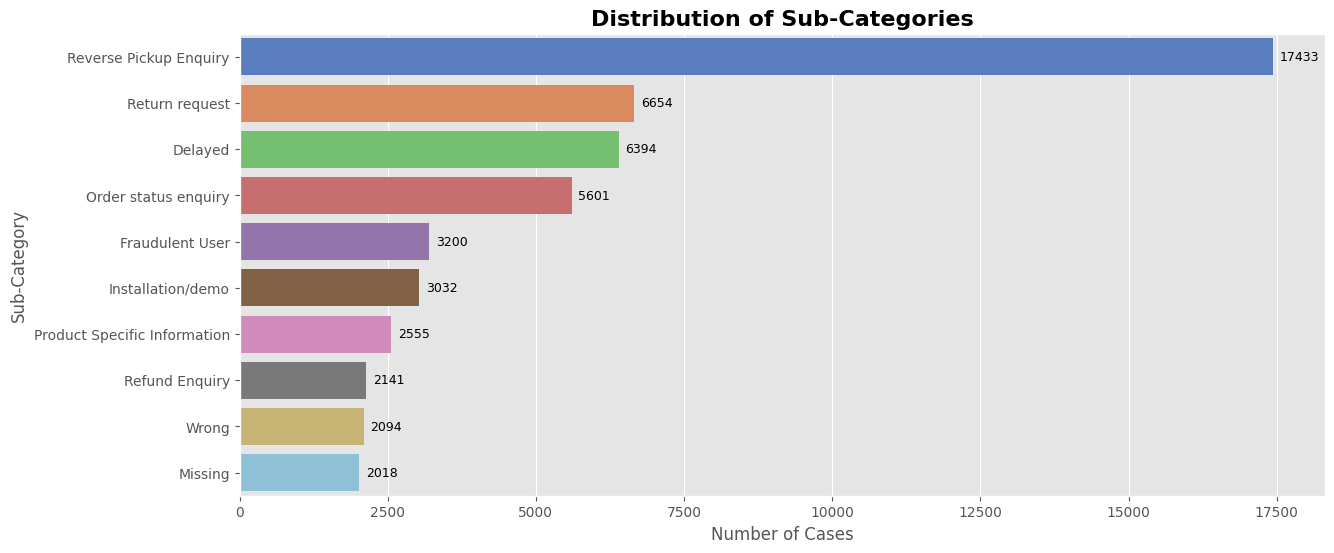

In [125]:
# Chart - 9 visualization code
# Set plot size
plt.figure(figsize=(14, 6))

# Top 10 sub-categories
top_sub_categories = df1['Sub-category'].value_counts().head(10)

# Plot sub-category distribution
ax = sns.barplot(x=top_sub_categories.values, y=top_sub_categories.index, palette='muted')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black', xytext=(5, 0),
                textcoords='offset points')

# Add Labels and Titles
plt.title('Distribution of Sub-Categories', fontsize=16, fontweight = 'bold')
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is used-
* To display the distribution of cases across sub-categories, making it easy to compare the frequency of different sub-categories side by side.

##### 2. What is/are the insight(s) found from the chart?

* Reverse Pickup Enquiry accounts for the highest volume of cases (17,433), indicating frequent product returns or pickup-related issues.
* Return requests (6,654) and Delayed cases (6,394) are also common, highlighting potential logistics or product quality concerns.
* Order status enquiries are relatively high (5,601), suggesting tracking or communication issues.
* Categories like Fraudulent User and Installation/demo have fewer cases, indicating less frequent occurrences of fraud or installation-related inquiries.
* Missing and wrong products have lower case volumes, but their presence indicates occasional order fulfillment issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Lower case volumes for issues like fraudulent users and wrong products indicate better security and order accuracy.
* Identifying high-frequency issues allows the company to prioritize operational improvements.

**Negative Impact:**

* The high volume of reverse pickup and return requests may indicate customer dissatisfaction with product quality or mismatched expectations.
* Frequent delays and order status inquiries could signal logistics inefficiencies, affecting overall customer experience.


#### Chart - 10 - CSAT Score Category Distribution

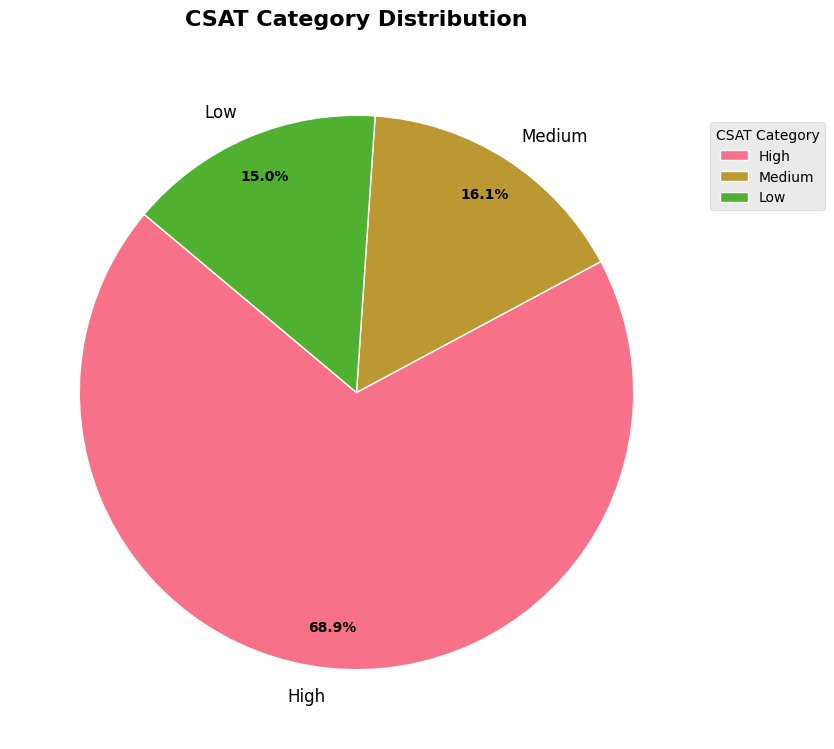

In [126]:
# Chart - 10 visualization code
# Group by CSAT Category and count occurrences
csat_distribution = df1['CSAT_Category'].value_counts()

# Set plot size and style
fig, ax = plt.subplots(figsize=(9, 9))
colors = sns.color_palette('husl')

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    csat_distribution,
    labels=csat_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=0.85
)

# Add title (aligned center)
plt.title('CSAT Category Distribution', fontsize=16, pad=15, fontweight = 'bold')

# Improve pie chart aesthetics
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, fontsize=12)

# Align legend properly to avoid overlap
plt.legend(csat_distribution.index, title='CSAT Category', loc='upper left', bbox_to_anchor=(1, 0.9))

# Display the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart effectively shows the proportion of each CSAT category (High, Medium, Low), making it easy to visualize the overall satisfaction levels at a glance.

##### 2. What is/are the insight(s) found from the chart?

* 68.9% of customers rated their satisfaction as High, indicating a positive service experience for the majority.
* 16.1% of customers provided a Medium rating, suggesting a neutral or moderate experience.
* 15.0% of customers rated their experience as Low, reflecting dissatisfaction.
* The high proportion of satisfied customers indicates strong overall service quality, but the combined 31.1% (Medium + Low) segment highlights improvement areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* The majority of customers are satisfied, which is a good indicator of service effectiveness and customer retention.
* A high CSAT percentage contributes to brand loyalty and positive word-of-mouth.

**Negative Impact:**
* The 31.1% dissatisfied or neutral customers suggests areas for service improvement.
* If medium and low satisfaction trends grow, it could lead to customer churn and a decline in customer retention.


#### Chart - 11 - Sentiment Score Distribution

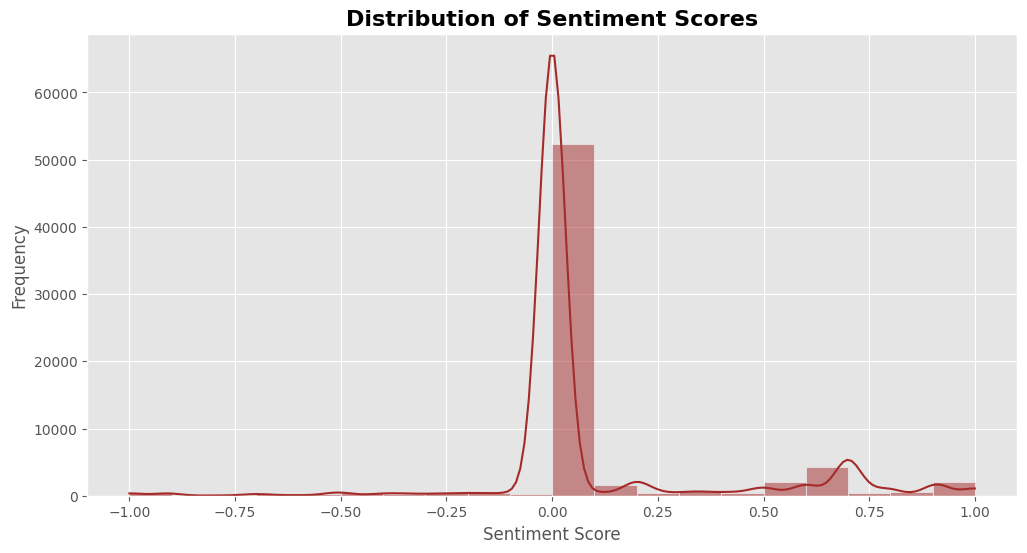

In [127]:
# Chart - 11 visualization code
# Set Figure Size
plt.figure(figsize=(12, 6))

# Plot sentiment score
ax = sns.histplot(df1['sentiment_score'], bins=20, kde=True, color='brown')

# Add title and labels
plt.title('Distribution of Sentiment Scores', fontsize=16, fontweight = 'bold')
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimate) was chosen-
* To display the distribution of sentiment scores, making it easy to visualize the spread and frequency of positive, negative, and neutral sentiments.
* The KDE line helps identify the density of sentiment scores smoothly across the range.

##### 2. What is/are the insight(s) found from the chart?

* The distribution is highly concentrated around 0, indicating that the majority of sentiment scores are neutral.
* There is a slight presence of positive and negative sentiment on either side, but they are less frequent.
* The peak near 0 suggests that most interactions are perceived as neither highly positive nor negative, indicating a balanced but unremarkable sentiment overall.
* The low occurrence of extreme negative or positive scores indicates fewer strong emotions in customer feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Boosting positive sentiment through proactive customer engagement or personalized services could enhance customer satisfaction and loyalty.
* Monitoring sentiment trends over time can help detect areas where customer experience might be improving or deteriorating.

**Neutral/Negative Impact:**
* The high volume of neutral sentiment may indicate that customers feel indifferent or uninspired, which could suggest a lack of emotional engagement.
* The lack of strong positive sentiment could imply that the customer experience is not exceeding expectations.
* The low negative sentiment is a positive sign, suggesting fewer extremely dissatisfied customers.




### **Bivariate Analysis**

#### Chart - 12 - CSAT Score by Support Channel (Categorical - Numerical)

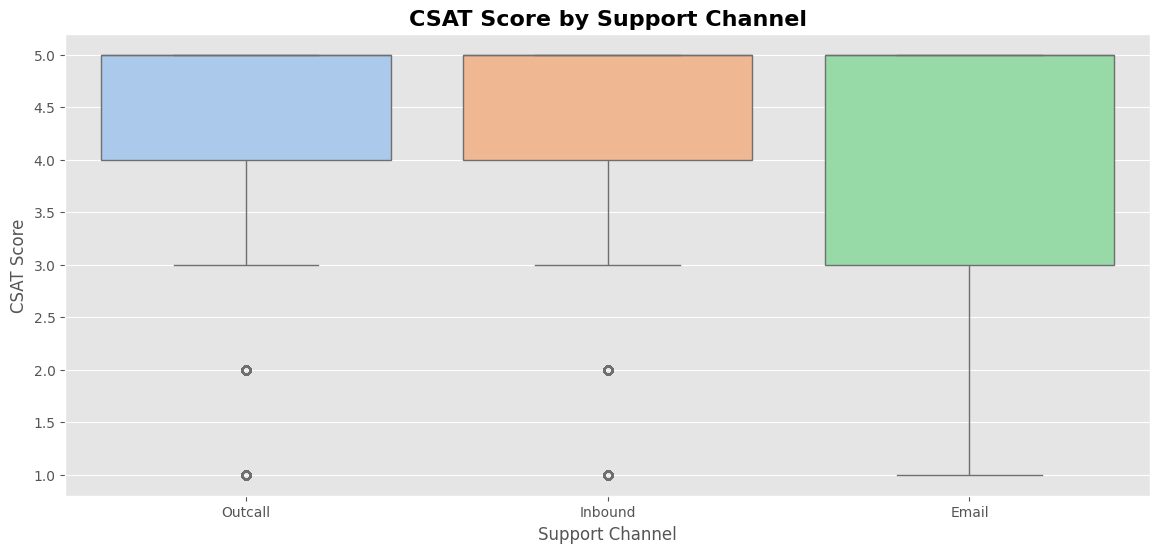

In [128]:
# Chart - 12 visualization code
# Set plot size
plt.figure(figsize=(14, 6))

# Plotting the relationship
ax = sns.boxplot(x='channel_name', y='CSAT Score', data=df1, palette='pastel')

# Add title and labels
plt.title('CSAT Score by Support Channel', fontsize=16, fontweight = 'bold')
plt.xlabel('Support Channel', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot displays the distribution, median, and outliers of CSAT scores by channel, helping compare customer satisfaction across channels.

##### 2. What is/are the insight(s) found from the chart?

* Email channel shows higher CSAT variability, with scores ranging from 1 to 5.
* Outcall and Inbound channels have similar CSAT distributions, mostly between 4 and 5.
* Outliers with low scores (1 and 2) appear in all channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Email's inconsistent CSAT suggests a need for service quality improvement.
* Outlier analysis can identify specific cases causing dissatisfaction.

**Negative Impact:**

No direct negative growth, but:
* Low-scoring outliers across channels indicate service issues that need addressing.

#### Chart - 13 - Interaction Duration v/s CSAT Score (Numerical - Numerical)


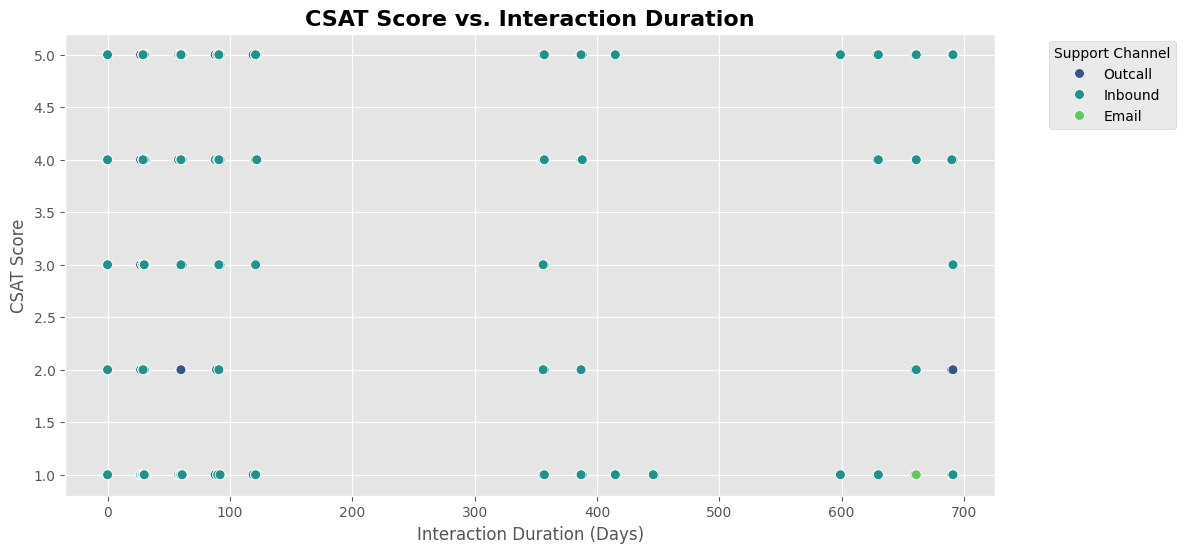

In [129]:
# Chart - 13 visualization code
# Set plot size
plt.figure(figsize=(12, 6))

# Scatter plot for interaction duration vs. CSAT
ax = sns.scatterplot(x='interaction_duration_days', y='CSAT Score', data=df1, hue='channel_name', palette='viridis', s = 50)

# Add title and labels
plt.title('CSAT Score vs. Interaction Duration', fontsize=16, fontweight = 'bold')
plt.xlabel('Interaction Duration (Days)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Add legend
plt.legend(title='Support Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot visualizes the relationship between CSAT scores and interaction duration, showing trends and clustering patterns.

##### 2. What is/are the insight(s) found from the chart?

* No clear correlation between CSAT scores and interaction duration.
* CSAT scores remain distributed across all durations, even at higher interaction days.
* Email and Inbound channels dominate longer interactions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Longer interactions do not guarantee higher satisfaction, suggesting a need for efficiency improvements.
* Channel-specific performance can be analyzed further.

**Negative Impact:**

No direct negative growth, but:
* Lengthy interactions with low CSAT scores indicate potential inefficiencies in support handling.

#### Chart - 14 - CSAT Score by Product Category (Numerical - Categorical)


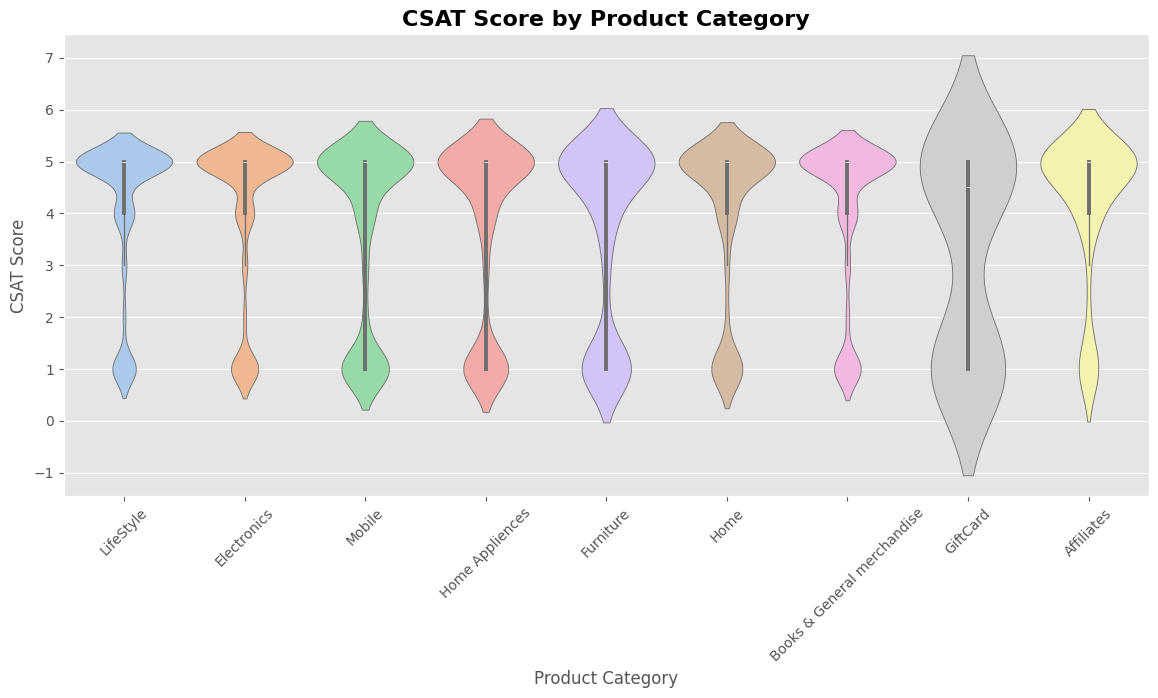

In [130]:
# Chart - 14 visualization code
# Set plot size
plt.figure(figsize=(14, 6))

# Filter Unknown Category
valid_categories = df1[df1['Product_category'] != 'Unknown Category']


# Violin plot for CSAT by product category
ax = sns.violinplot(x='Product_category', y='CSAT Score', data=valid_categories, palette='pastel')

# Add title and labels
plt.title('CSAT Score by Product Category', fontsize=16, fontweight = 'bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot shows the distribution and density of CSAT scores across different product categories, highlighting variations and spread.

##### 2. What is/are the insight(s) found from the chart?

* GiftCard category has the widest distribution, indicating high variability in customer satisfaction.
* Most categories have CSAT scores concentrated around 4-5, suggesting generally positive feedback.
* Mobile and Home Appliances show lower scores, indicating dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Targeted improvements in low-performing categories (Mobile, Home Appliances) can boost overall CSAT.
* Stable categories indicate consistency in satisfaction.

**Negative Impact:**

* Low CSAT scores in Mobile and Home Appliances may indicate product quality issues or poor support, potentially harming retention.

#### Chart - 15 - CSAT Score by City (Numerical - Categorical)


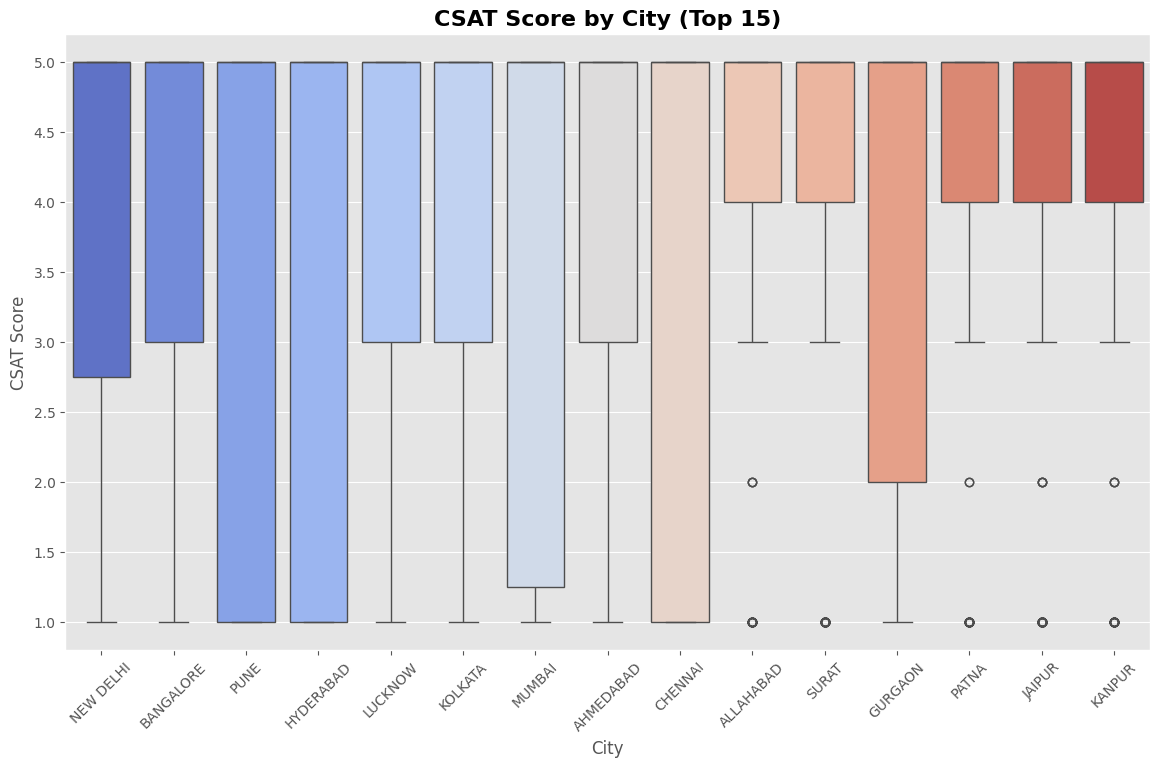

In [131]:
# Chart - 15 visualization code
# Set plot size and style
plt.figure(figsize=(14, 8))

# Filter out "Unknown" City
valid_cities = df1[df1['Customer_City'] != 'Unknown City']

# Plot the relationship between CSAT and city
top_cities = valid_cities['Customer_City'].value_counts().head(15).index
city_data = df1[df1['Customer_City'].isin(top_cities)]

# Boxplot for CSAT by city
ax = sns.boxplot(x='Customer_City', y='CSAT Score', data=city_data, palette='coolwarm')

# Add title and labels
plt.title('CSAT Score by City (Top 15)', fontsize=16,fontweight = 'bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar box plot shows CSAT score distribution across the top 15 cities, highlighting variability and outliers.

##### 2. What is/are the insight(s) found from the chart?

* Chennai, Gurgaon, and Pune have high CSAT scores, indicating better customer satisfaction.
* Allahabad, Patna, and Kanpur show low scores with outliers, indicating dissatisfaction.
* Wider distribution in Gurgaon and Chennai indicates score variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Cities with high CSAT can be leveraged for marketing or case studies.
* Low-scoring cities indicate areas needing service improvement.

**Negative Impact:**

* Low CSAT scores in cities like Allahabad and Patna may indicate service issues, risking customer churn.

#### Chart - 16 - Connected Handling Time  v/s  CSAT Score (Numerical - Numerical)


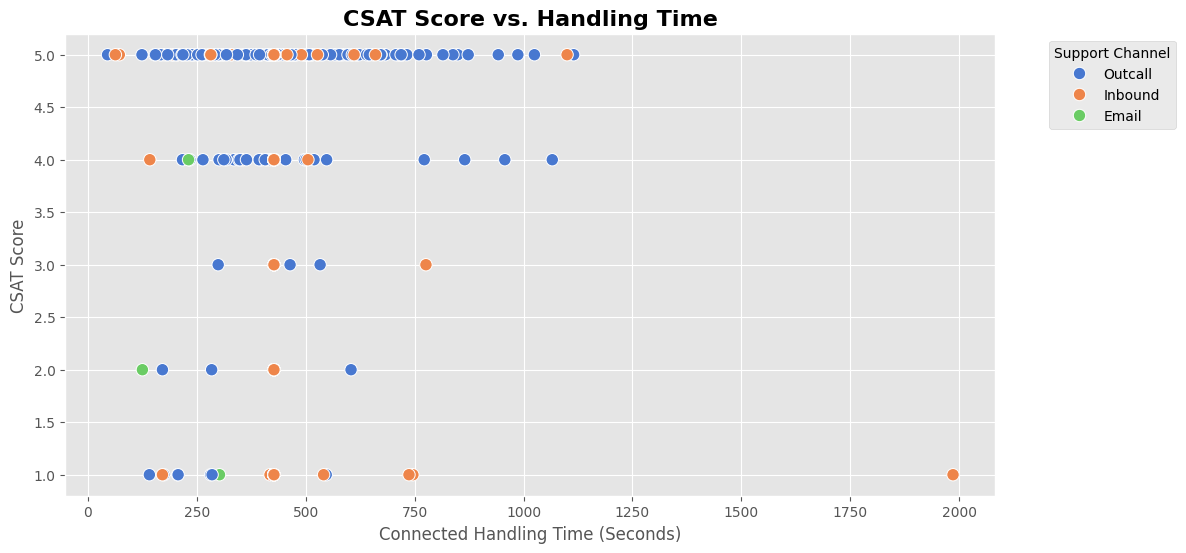

In [132]:
# Chart - 16 visualization code
# Set plot size
plt.figure(figsize=(12, 6))


# Scatter plot for handling time vs. CSAT
ax = sns.scatterplot(x='connected_handling_time', y='CSAT Score', data=df1, hue='channel_name', palette='muted', s = 80)

# Add title and labels
plt.title('CSAT Score vs. Handling Time', fontsize=16, fontweight = 'bold')
plt.xlabel('Connected Handling Time (Seconds)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
# Add Legend
plt.legend(title='Support Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot shows the relationship between handling time and CSAT score, revealing trends or lack of correlation across support channels.

##### 2. What is/are the insight(s) found from the chart?

* No clear correlation between handling time and CSAT score.
* High CSAT scores are distributed evenly across different handling times.
* Outcall and Inbound channels dominate, while Email has fewer interactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
Since handling time doesn't significantly impact CSAT, the focus should shift to improving other factors (e.g., agent performance, issue resolution).

**Negative Impact:**

No direct negative impact, but prolonged handling times with no CSAT improvement could waste resources.

#### Chart - 17 - Interaction Duration vs. Connected Handling Time (Numerical - Numerical)


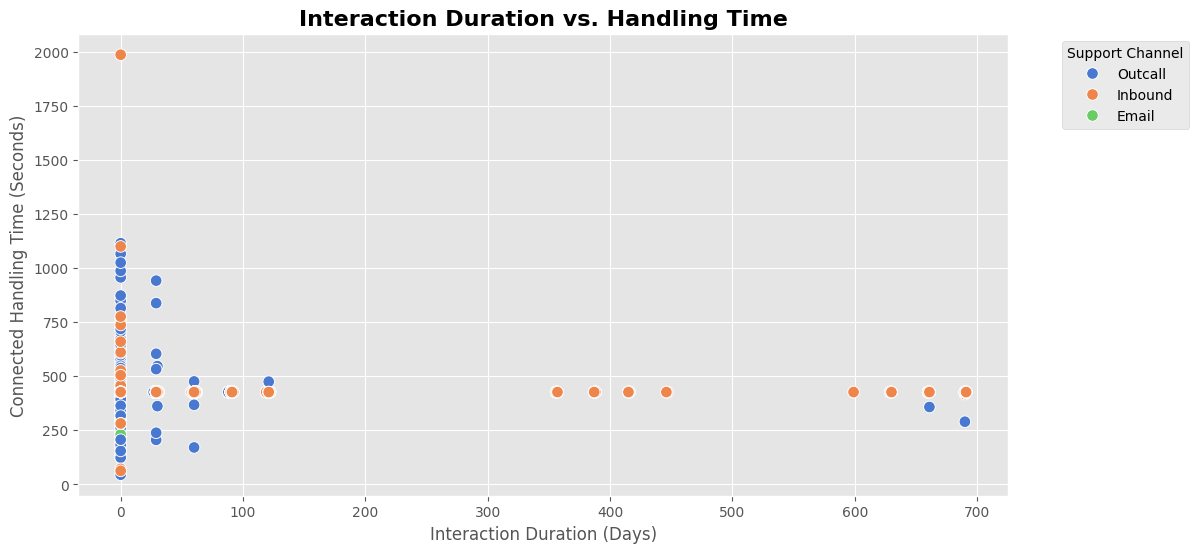

In [133]:
# Chart - 17 visualization code
# Set plot size
plt.figure(figsize=(12, 6))


# Scatter plot for interaction duration vs. handling time
ax = sns.scatterplot(x='interaction_duration_days', y='connected_handling_time', data=df1, hue='channel_name', palette='muted', s = 70)

# Add title and labels
plt.title('Interaction Duration vs. Handling Time', fontsize=16, fontweight = 'bold')
plt.xlabel('Interaction Duration (Days)', fontsize=12)
plt.ylabel('Connected Handling Time (Seconds)', fontsize=12)
plt.legend(title='Support Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot effectively displays the relationship between interaction duration and handling time across different support channels.

##### 2. What is/are the insight(s) found from the chart?

* Short interaction durations dominate, mostly under 100 days, with varied handling times.
* Longer interaction durations (>300 days) have consistent handling times around 500-600 seconds.
* Outcall and Inbound channels are more frequent, while Email interactions are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Efficient handling for longer durations indicates consistent resolution times, which is a positive indicator.
* Frequent short-duration interactions could be streamlined for efficiency.

**Negative Impact:**

No direct negative impact, but prolonged interactions with inconsistent handling times could indicate inefficient processes.

#### Chart - 18 - CSAT Score by Tenure Buckets (Numerical - Categorical)


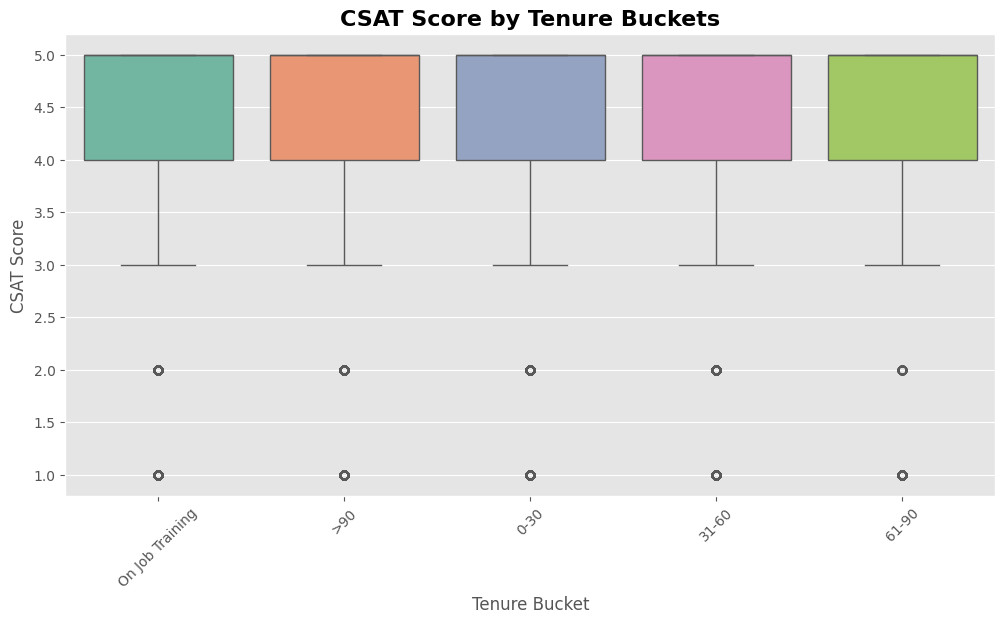

In [134]:
# Chart - 18 visualization code
# Set plot size
plt.figure(figsize=(12, 6))

# Box plot for CSAT by tenure buckets
ax = sns.boxplot(x='Tenure Bucket', y='CSAT Score', data=df1, palette='Set2')

# Add title and labels
plt.title('CSAT Score by Tenure Buckets', fontsize=16, fontweight = 'bold')
plt.xlabel('Tenure Bucket', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.xticks(rotation=45)

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A box plot effectively displays the CSAT score distribution across tenure buckets, highlighting median values, ranges, and outliers.

##### 2. What is/are the insight(s) found from the chart?

* Consistent CSAT scores across all tenure buckets, with a median of around 4.5-5.
* Outliers with low CSAT scores (1-2) are present in all tenure groups.
* On-job training and >90 days tenure show slightly better score consistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Consistent CSAT across tenure buckets indicates stable service quality.
* No major performance drop across tenure, suggesting effective training.

**Negative Impact:**

No major negative insights, but outliers with low CSAT scores may indicate isolated dissatisfaction.

#### Chart - 19 - Item Price v/s CSAT Score (Numerical - Numerical)


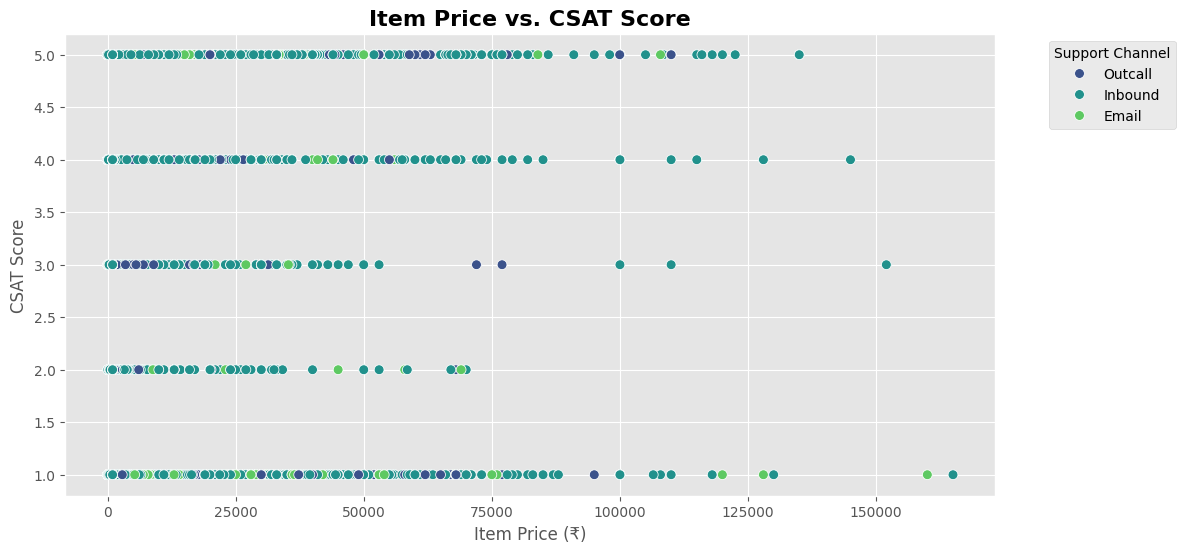

In [135]:
# Chart - 19 visualization code
# Plot figure size
plt.figure(figsize=(12, 6))

# Plot item price vs. CSAT
ax = sns.scatterplot(x='Item_price', y='CSAT Score', data=df1, hue='channel_name', palette='viridis', s = 50)

# Add labels and title
plt.title('Item Price vs. CSAT Score', fontsize=16, fontweight = 'bold')
plt.xlabel('Item Price (₹)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Add Legend
plt.legend(title='Support Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot effectively displays the relationship between item price and CSAT score, showing distribution patterns and potential trends across support channels.


##### 2. What is/are the insight(s) found from the chart?

* CSAT scores remain high (4-5) across all item price ranges.
* No clear correlation between item price and satisfaction.
* Low CSAT scores (1-2) occur across all price points, indicating price isn't a major factor in customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Since price doesn't significantly impact CSAT, the focus should be on service quality rather than pricing strategies.

**Negative Impact:**

No direct negative impact, but low CSAT scores at high price points may indicate dissatisfaction with premium products.

#### Chart - 20 - CSAT Score v/s Sentiment Score (Numerical - Numerical)


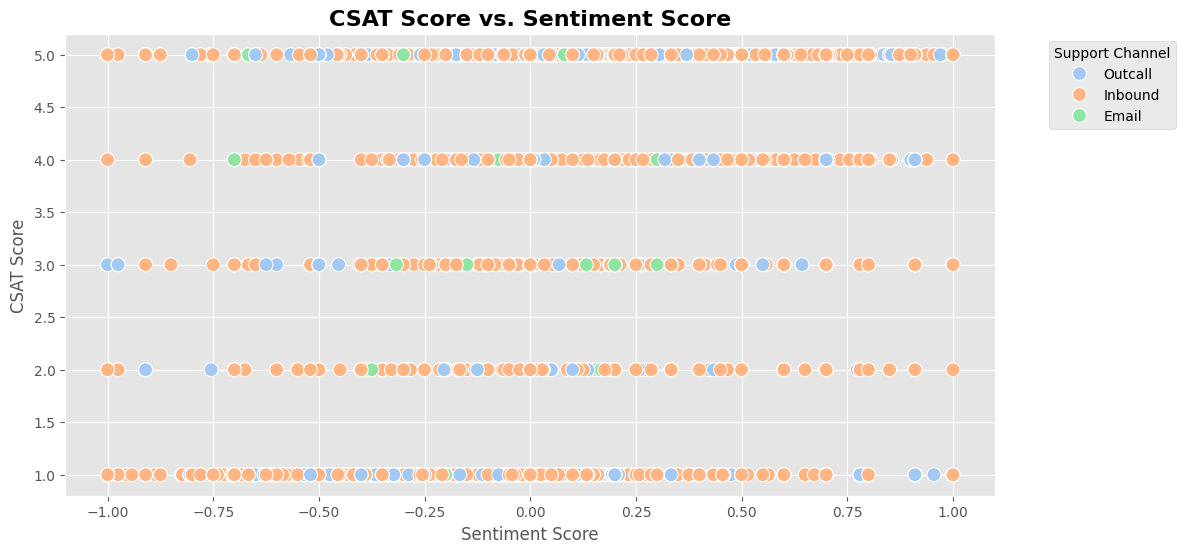

In [136]:
# Chart - 20 visualization code
# Set figure size
plt.figure(figsize=(12, 6))

# Plot CSAT score vs. sentiment score
ax = sns.scatterplot(x='sentiment_score', y='CSAT Score', data=df1, hue='channel_name', palette='pastel', s = 100)

# Add title and Label
plt.title('CSAT Score vs. Sentiment Score', fontsize=16, fontweight = 'bold')
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)

# Add Legend
plt.legend(title='Support Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot clearly shows the relationship between sentiment score and CSAT across different support channels, revealing trends and distribution patterns.

##### 2. What is/are the insight(s) found from the chart?

* Higher sentiment scores (closer to +1) correspond to higher CSAT scores (4-5).
* Negative sentiment (near -1) shows more low CSAT scores (1-2).
* Neutral sentiment (0) has mixed CSAT ratings, indicating inconsistent satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Sentiment scores accurately reflect CSAT, allowing businesses to predict dissatisfaction and take proactive measures.

**Negative Impact:**

Negative sentiment consistently results in lower CSAT, highlighting the need for improved support quality to prevent churn.

#### Chart - 21 - CSAT Score by Agent Shift (Numerical - Categorical)

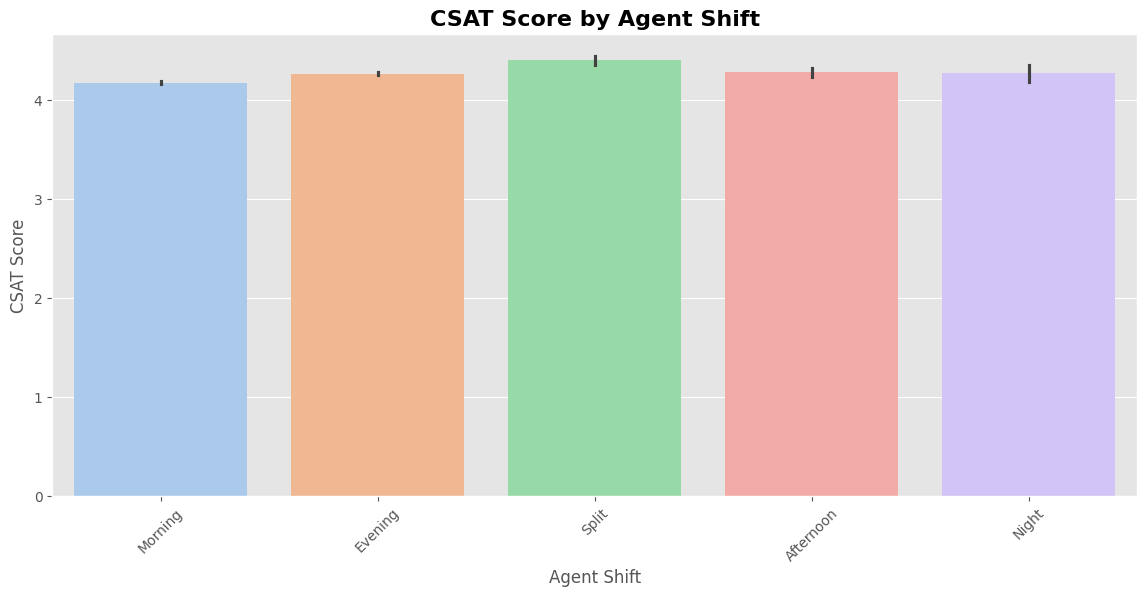

In [137]:
# Chart - 21 visualization code
# Set figure size
plt.figure(figsize=(14, 6))

# Bar plot for CSAT by agent shift
sns.barplot(x='Agent Shift', y='CSAT Score', data=df1, palette = 'pastel')

# Add Title and Label
plt.title('CSAT Score by Agent Shift', fontsize=16, fontweight = 'bold')
plt.xlabel('Agent Shift', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.xticks(rotation=45)

# Show Plot
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart effectively compares average CSAT scores across different agent shifts, making it easy to spot differences.


##### 2. What is/are the insight(s) found from the chart?

* Split shift agents have the highest CSAT scores, indicating better performance.
* Night and Evening shifts have slightly lower scores, suggesting marginally lower customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Optimizing staffing during high-performing shifts (Split) could enhance CSAT.

**Negative Impact:**

Night shift's lower CSAT may indicate fatigue or service inefficiency, requiring training or process improvement.

#### Chart - 22 - Top Performing Agents by Average CSAT Score (Categorical - Numerical)

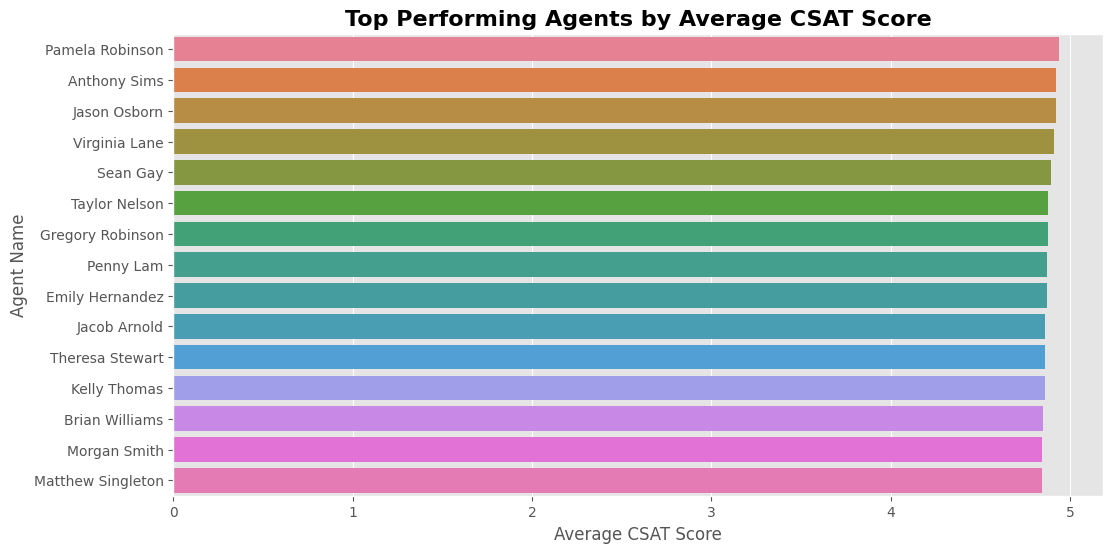

In [138]:
# Chart - 22 visualization code
# Set plot size and style
plt.figure(figsize=(12, 6))

# Select top 15 agents by average CSAT score
top_agents = df1.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(15)

# Plot top-performing agents
ax = sns.barplot(x=top_agents.values, y=top_agents.index, palette='husl')

# Add title and labels
plt.title('Top Performing Agents by Average CSAT Score', fontsize=16, fontweight = 'bold')
plt.xlabel('Average CSAT Score', fontsize=12)
plt.ylabel('Agent Name', fontsize=12)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart clearly displays the top-performing agents by CSAT score, making it easy to compare their performance.

##### 2. What is/are the insight(s) found from the chart?

* Pamela Robinson, Anthony Sims, and Jason Osborn have the highest average CSAT scores, indicating consistently excellent service.
* The top agents maintain scores close to 5.0, showing they excel in customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Recognizing and rewarding top performers can boost morale and encourage consistency.
* Their practices can be replicated through training for lower-performing agents.

**Negative Impact:**

However, over-reliance on top agents may lead to burnout, potentially affecting CSAT scores in the long run.

#### Chart - 23 - Top Underperforming Agents by Average CSAT Score (Categorical - Numerical)

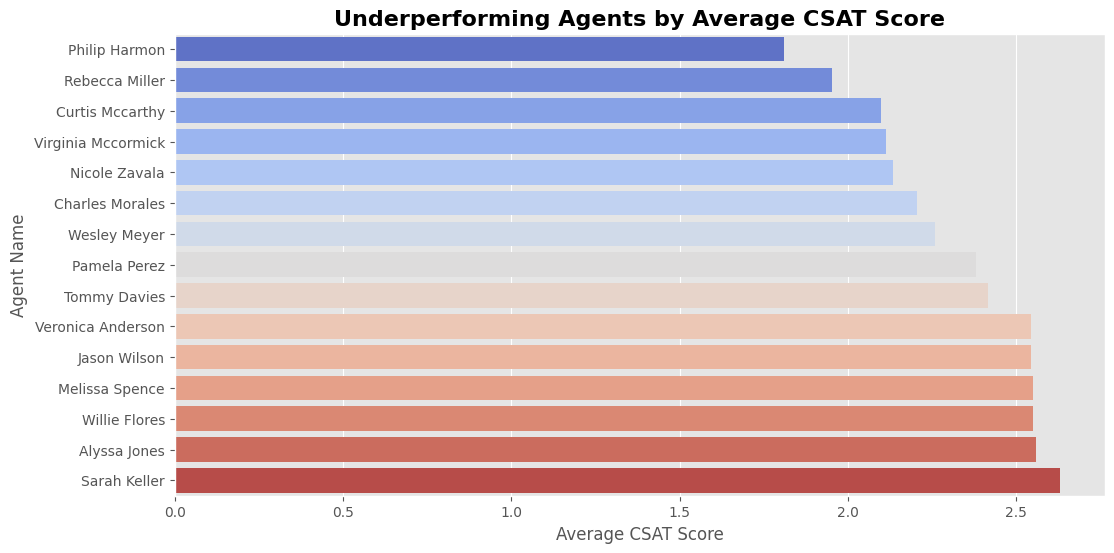

In [139]:
# Chart - 23 visualization code
# Set plot size
plt.figure(figsize=(12, 6))


# Select bottom 15 agents by average CSAT score
bottom_agents = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=True).head(15)

# Plot underperforming agents
ax = sns.barplot(x=bottom_agents.values, y=bottom_agents.index, palette='coolwarm')

# Add title and labels
plt.title('Underperforming Agents by Average CSAT Score', fontsize=16, fontweight = 'bold')
plt.xlabel('Average CSAT Score', fontsize=12)
plt.ylabel('Agent Name', fontsize=12)

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is used to clearly display the underperforming agents along with their average CSAT scores, making it easy to compare individual agent performance.

##### 2. What is/are the insight(s) found from the chart?

* The chart highlights the lowest-performing agents based on their average CSAT scores.
* Agents like Philip Harmon and Curtis Mccarthy have the poorest scores, indicating potential performance issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Identifying underperforming agents allows for targeted training and performance improvement strategies, which can enhance overall customer satisfaction.

**Negative Impact:**

Low-performing agents can negatively impact customer retention and brand reputation, potentially reducing repeat business and customer loyalty.

#### Chart - 24 - CSAT Score by Manager (Numerical - Categorical)

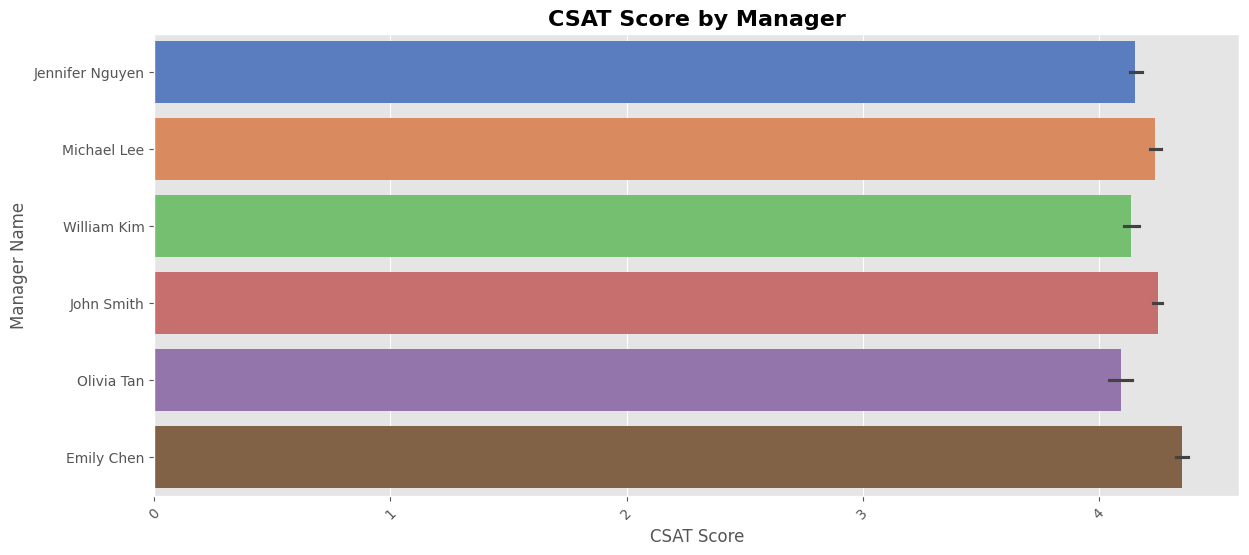

In [140]:
# Chart - 24 visualization code
# Set plot size
plt.figure(figsize=(14, 6))

# Plot CSAT by Manager
ax = sns.barplot(x='CSAT Score', y='Manager', data=df1, palette='muted')

# Add title and labels
plt.title('CSAT Score by Manager', fontsize=16, fontweight = 'bold')
plt.xlabel('CSAT Score', fontsize=12)
plt.ylabel('Manager Name', fontsize=12)
plt.xticks(rotation=45)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively displays the CSAT scores by manager, making it easy to compare performance across different managers.

##### 2. What is/are the insight(s) found from the chart?

Managers like Emily Chen and Olivia Tan have higher CSAT scores, indicating better customer satisfaction, while others show relatively lower scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Recognizing managers with higher CSAT scores can help promote best practices across teams, improving overall customer satisfaction.

**Negative Impact:**

This chart mainly highlights managerial performance; it doesn’t directly indicate negative growth but shows areas for potential improvement.

#### Chart - 25 - Ticket Volume Over Time

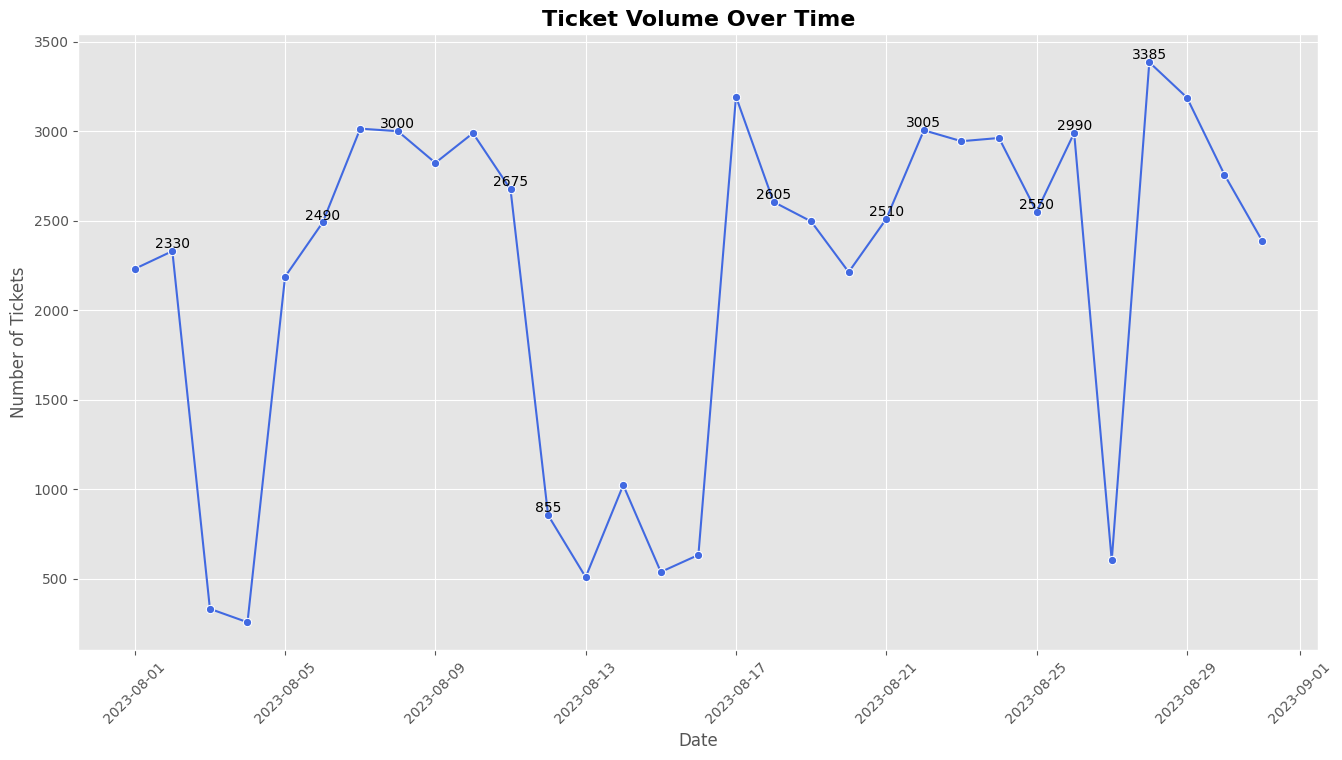

In [141]:
# Chart - 25 visualization code
# Set plot size
plt.figure(figsize=(16, 8))


# Group by survey response date and count the number of tickets
ticket_volume = df1.groupby('Survey_response_Date').size().reset_index(name='ticket_count')

# Plot ticket volume over time
ax = sns.lineplot(x='Survey_response_Date', y='ticket_count', data=ticket_volume, color='royalblue', marker='o')

# Add data labels at key points
for x, y in zip(ticket_volume['Survey_response_Date'], ticket_volume['ticket_count']):
    if y % 5 == 0:  # Display data labels every 5th point
        plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10, color='black')

# Add title and labels
plt.title('Ticket Volume Over Time', fontsize=16, fontweight = 'bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A line chart effectively visualizes ticket volume trends over time, showing fluctuations and identifying peak and low periods.

##### 2. What is/are the insight(s) found from the chart?

* Significant fluctuations in ticket volume, with sharp drops around August 5 and August 25.
* The highest volume occurs near August 29 with 3,385 tickets.
* Low points with minimal ticket activity around August 13 and August 25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Identifying periods of high and low ticket volume helps in resource planning and staff allocation to handle peak loads efficiently.

**Negative Impact:**

The chart shows seasonal fluctuations in ticket volume but does not directly indicate negative growth.

#### Chart - 26 - CSAT Score Over Time

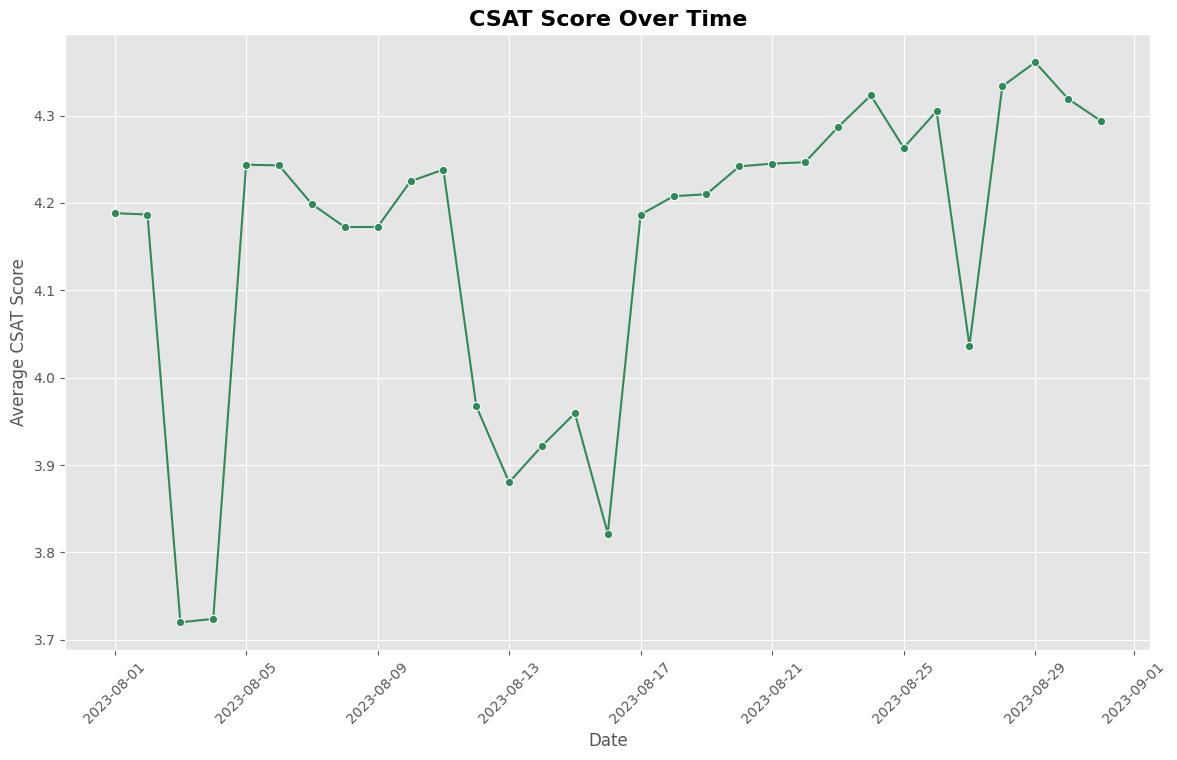

In [142]:
# Chart - 26 visualization code
# Set plot size
plt.figure(figsize=(14, 8))


# Group by survey response date and calculate average CSAT score
csat_trend = df1.groupby('Survey_response_Date')['CSAT Score'].mean().reset_index()

# Plot CSAT score over time
ax = sns.lineplot(x='Survey_response_Date', y='CSAT Score', data=csat_trend, color='seagreen', marker='o')

# Add title and labels
plt.title('CSAT Score Over Time', fontsize=16, fontweight = 'bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A line chart effectively visualizes ticket volume trends over time, showing fluctuations and identifying peak and low periods.

##### 2. What is/are the insight(s) found from the chart?

* Significant fluctuations in ticket volume, with sharp drops around August 5 and August 25.
* The highest volume occurs near August 29 with 3,385 tickets.
* Low points with minimal ticket activity around August 13 and August 25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Identifying periods of high and low ticket volume helps in resource planning and staff allocation to handle peak loads efficiently.

**Negative Impact:**

The chart shows seasonal fluctuations in ticket volume but does not directly indicate negative growth.

### **Multivariate Analysis**

#### Chart - 27 - Correlation Heatmap

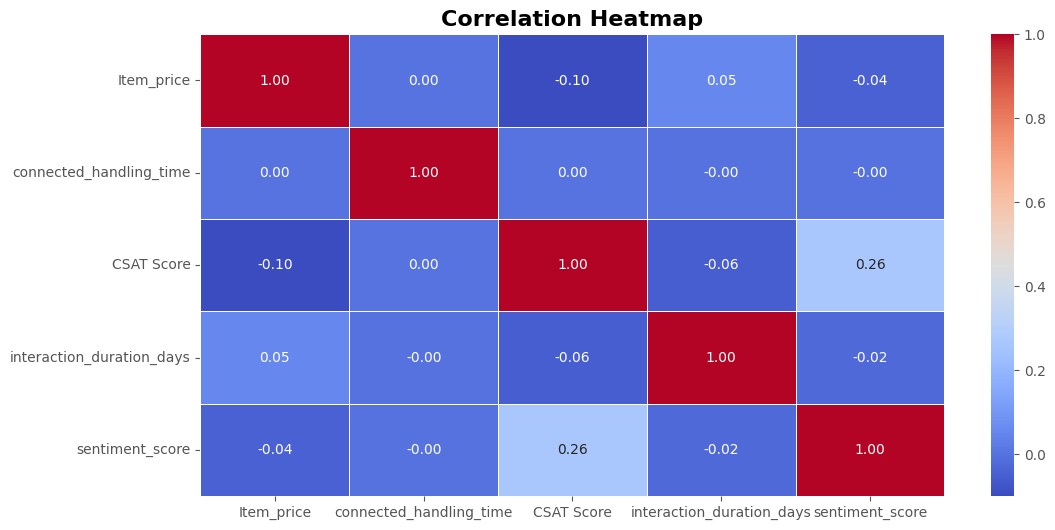

In [143]:
# Correlation Heatmap visualization code
# Set plot size
plt.figure(figsize=(12, 6))

# Correlation matrix
corr = df1.corr(numeric_only=True)

# Plot heatmap
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=16, fontweight = 'bold')

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is a great way-
* To visualize relationships between numerical variables in a dataset.
* The color scale helps quickly identify positive, negative, or no correlation between features.

##### 2. What is/are the insight(s) found from the chart?

**Positive Correlation:**

* The CSAT Score and Sentiment Score have a moderate positive correlation of 0.26, indicating that higher CSAT scores tend to be associated with more positive sentiments.

**Weak or No Correlation:**
* Item price has no meaningful correlation with other variables, suggesting that customer satisfaction or interaction duration is not influenced by price.
* Interaction duration and connected handling time have a near zero correlation with most other variables, indicating independence between interaction time and sentiment or satisfaction.
* The sentiment score has no correlation with handling time or interaction duration, suggesting that customer sentiment is not significantly influenced by the length of interaction.

#### Chart - 28 - Pair Plot

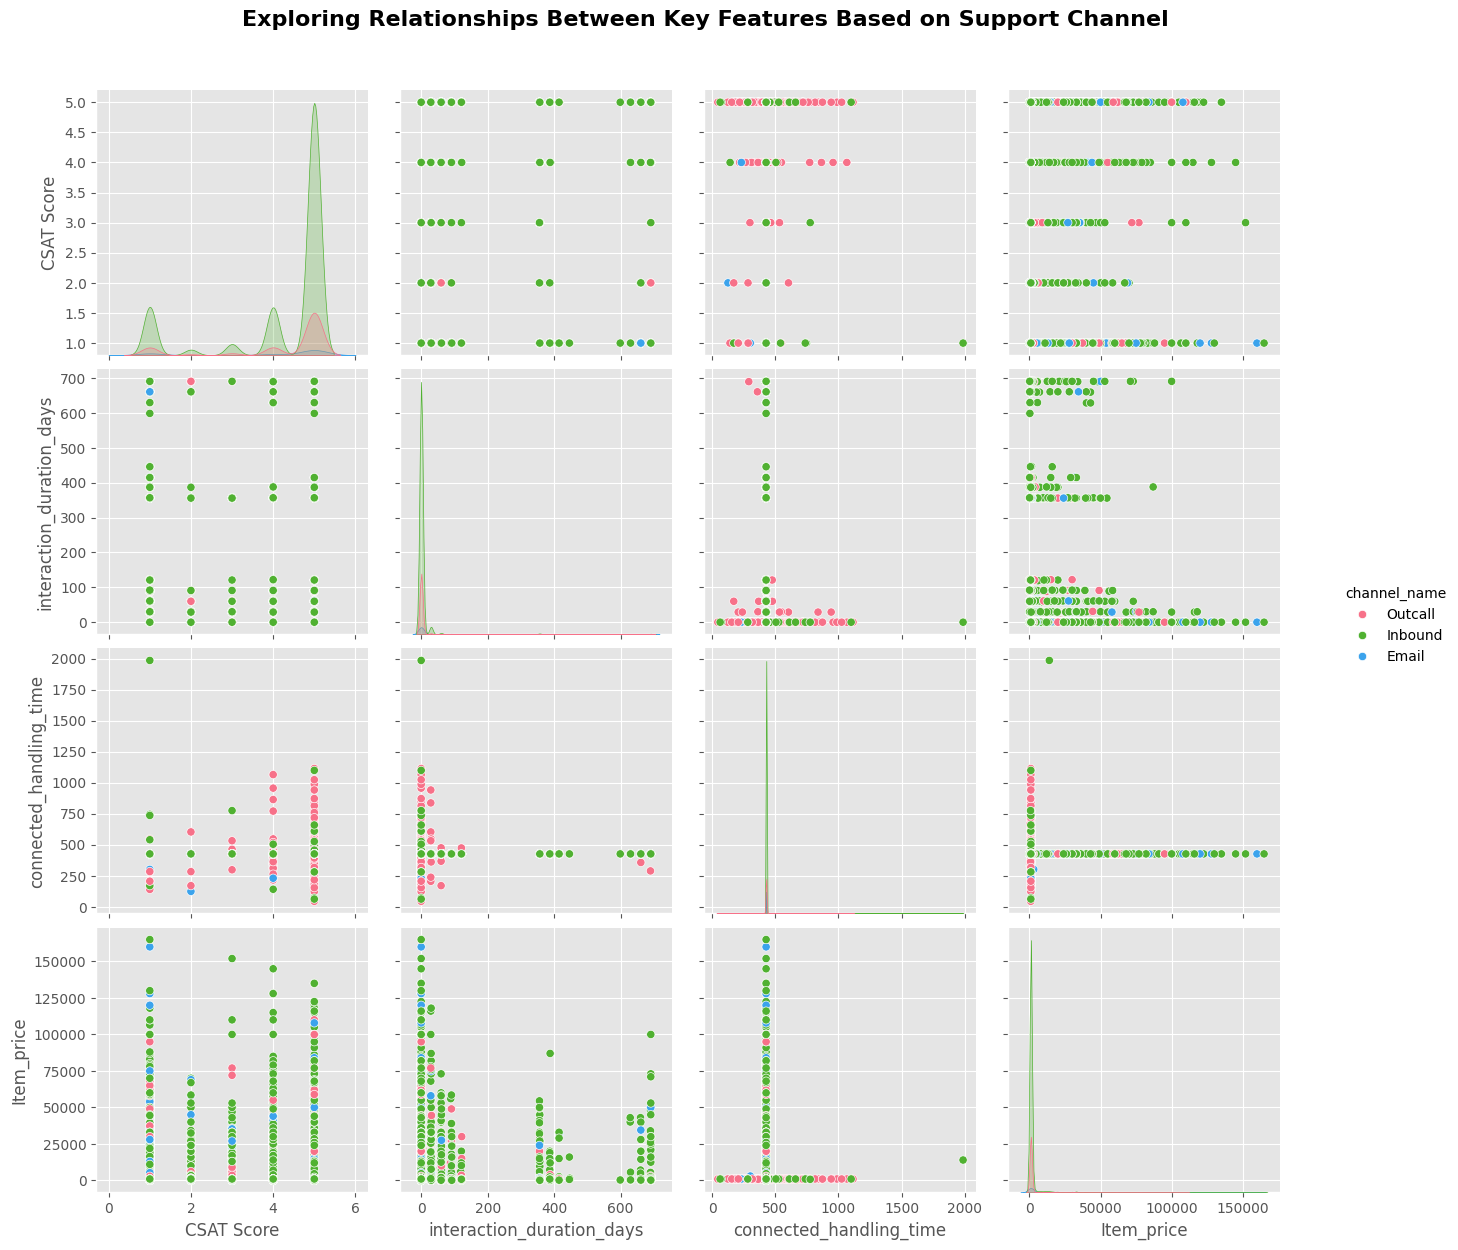

In [144]:
# Selecting relevant numerical columns
correlation_columns = ['CSAT Score', 'interaction_duration_days', 'connected_handling_time', 'Item_price']


# Creating pair plot with 'type' as hue
pairplot = sns.pairplot(
    df1,
    vars=correlation_columns,
    hue='channel_name',  # Color based on 'content_type'
    palette='husl',
    diag_kind='kde',  # Kernel Density Estimate for diagonal

)

# Adjusting the figure size
pairplot.fig.set_size_inches(15, 12)


# Adjust the title and overall layout
pairplot.fig.suptitle('Exploring Relationships Between Key Features Based on Support Channel', fontsize=16, fontweight='bold', y=1.05)


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot shows-
* Relationships between multiple numerical variables, helping detect correlations, clusters, and outliers.
* It also visualizes channel distribution through color encoding.

##### 2. What is/are the insight(s) found from the chart?

* No strong correlations between numerical variables.
* Outcall interactions dominate, while Email is less frequent.
* Item price shows outliers with a few high-priced products.
* Interaction and handling times cluster around lower values.
* Weak relationship between sentiment and CSAT scores.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Here are the key recommendations to help the client achieve their business objectives:
1. **Enhance Service in Low CSAT Cities:** Focus on targeted agent training and faster resolution times.
2. **Optimize Handling Time:** Streamline processes to reduce handling time, improving customer satisfaction.
3. **Sentiment-Driven Improvements:** Use sentiment analysis to detect dissatisfaction early and take proactive steps.
4. **Agent Performance Enhancement:** Incentivize top-performing agents and provide targeted training for underperformers.
5. **Resource Allocation Optimization:** Adjust resources during peak ticket volumes to reduce wait times.
6. **Leverage Manager Best Practices:** Replicate strategies of high-performing managers across teams.
7. **Focus on Service Quality, Not Price:** Prioritize service experience over pricing changes for better CSAT.

These actions will enhance customer satisfaction, boost efficiency, and drive business growth.









# **Conclusion**

The Flipkart CSAT analysis offers valuable insights into customer satisfaction drivers, agent performance, and service quality. By addressing inefficiencies, replicating best practices, and focusing on customer-centric improvements, the business can enhance overall satisfaction, foster loyalty, and achieve long-term success. This project serves as a foundation for data-driven decision-making and continuous service optimization.